In [10]:
import sys
sys.path.append('/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/dhnlplotting/util')

import glob
import os
from plot_base import PlotBase
from IPython.display import display, Image
import ROOT
ROOT.gROOT.SetStyle("ATLAS")
from array import array
import importlib
import plot_base
import plot_util
import plot_classes
import numpy as np
importlib.reload(plot_base)
importlib.reload(plot_util)
importlib.reload(plot_classes)

output_strings = []
yields = {}

signal_selection = {
    'uuu': "*(DV_2medium > 0) \
            *(DV_mass > 5.5) \
            *(DV_pass_lep_pt >0) \
            *((mll_dMu_plep_is_OS ==1 && (mll_dMu_plep < 80 || mll_dMu_plep > 100)) || mll_dMu_plep_is_SS ==1 ) \
            *(mvis>40 && mvis < 90) \
            *(HNLm<25) \
            *(DV_cosmic_sep > 0.05)",

    'eee': "*(DV_2veryveryloose > 0) \
            *(DV_pass_lep_pt >0) \
            *(DV_mass > 5.5) \
            *((mll_dEl_plep_is_OS ==1 && (mll_dEl_plep < 80 || mll_dEl_plep > 100)) || mll_dEl_plep_is_SS==1) \
            *(DV_pass_mat_veto >0) \
            *(mvis>40 && mvis < 90) \
            *(HNLm<20) \
            *(DV_cosmic_sep > 0.05)",

    'uue': "*(DV_medium_veryveryloose > 0) \
            *(((DV_mass >2 && DV_mass <5.5) && DV_mass > -(7/150) \
            *DV_r + 7 ) || DV_mass > 5.5) \
            *(DV_cosmic_sep > 0.05) \
            *(DV_pass_lep_pt >0) \
            *((mll_dMu_plep_is_OS ==1 && (mll_dMu_plep < 80 || mll_dMu_plep > 100))|| mll_dMu_plep_is_SS ==1) \
            *(mvis>40 && mvis<90) \
            *(HNLm<20) \
            *(DV_cosmic_sep > 0.05)",

    'eeu': "*(DV_medium_veryveryloose > 0) \
            *(((DV_mass >2 && DV_mass <5.5) && DV_mass > -(7/150) \
            *DV_r + 7 ) || DV_mass > 5.5) \
            *(DV_cosmic_sep > 0.05) \
            *(DV_pass_lep_pt >0) \
            *((mll_dEl_plep_is_OS ==1 && (mll_dEl_plep < 80 || mll_dEl_plep > 100))|| mll_dEl_plep_is_SS ==1) \
            *(mvis > 40 && mvis<90) \
            *(HNLm<20) \
            *(DV_cosmic_sep > 0.05)",
}

for hist_file in glob.glob('/data/hnl/histograms/v5p0_histograms/histograms_*.root'):
    if 'histograms_all' in hist_file: continue
    if 'mc16' in hist_file: continue

    tokens = hist_file.split('/')[5].split('_')
#     id = hist_file.split('/')[5].replace('.root', '').replace('histograms_','')
#     print(id)
    file_lifetime = int(tokens[3].split('mm')[0])
    file_mass = float(tokens[2][:-1].replace('p','.'))
    channel = tokens[1]


    hist_channels = [
        {'filename':hist_file, 
        'label':'Signal selection', 
        'vtx_alg':'VSI_LeptonsMod', 
        'selection':'DVtype', 
        'MCtype':'LNC', 
        'extra_cuts':signal_selection[channel],
        # 'extra_cuts':'',
        },
        {'filename':hist_file, 
        'label':'W/ prompt trigger matching', 
        'vtx_alg':'VSI_LeptonsMod', 
        'selection':'DVtype',
        'MCtype':'LNC', 
        'extra_cuts':signal_selection[channel]+'*(plep_is_trigger_matched>0)', # 
        # 'extra_cuts':''+'*(plep_is_trigger_matched>0)',
        },
    ]

    samples = ['uuu', 'uuu_triggermatched',]
    output_dir = '/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/'
    norm = False
    vtx_channel = "VSI_LeptonsMod"

    hist_ratio = plot_classes.Hist1DRatio(hist_channels= hist_channels,

        types = samples,
        output_dir = output_dir,
        name="plep_pt",
        x_title ="prompt lepton p_{T}",
        x_units ="GeV",
        x_min = 0,
        x_max = 100 ,
        y_min = 0,
        rebin = 4,
        use_ntuple = True,
        ntup_nbins =100,
        norm = norm,
        log_scale_y = False,
        draw_markers = True,
        mass = file_mass,
        lifetime = file_lifetime,
        channel = channel,
        extra_legend_lines = [vtx_channel, f'{file_mass} GeV, {file_lifetime}mm, {channel}'],
        ratio_ymin=  -0.1, 
        ratio_ymax = 2.1,
        draw_yield=True,
        save_file=True,
        );

# display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/plep_pt_ratio.png'));

    yield_ratio = np.divide(hist_ratio.yields[1],hist_ratio.yields[0])
    output_string = f'{file_mass} GeV, {file_lifetime}mm, {channel}, {hist_ratio.yields[1]:0.2f}/{hist_ratio.yields[0]:0.2f} = {yield_ratio:0.2f}'
    output_strings.append(f'{file_mass} GeV, {file_lifetime}mm, {channel}, yield: {hist_ratio.yields[1]:0.8f}')
    yields[(channel, file_mass, file_lifetime)] = ((hist_ratio.yields[0], hist_ratio.yields[1]))
    # break


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:126: RuntimeWarning: invalid value encountered in true_divide
Info in <TCanvas::Print>: pdf file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/plep_pt_ratio/uue_3GeV_1mm.pdf has been created
Info in <TCanvas::Print>: png file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/plep_pt_ratio/uue_3GeV_1mm.png has been created
Info in <TCanvas::Print>: pdf file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/plep_pt_ratio/uuu_12GeV_1mm.pdf has been created
Info in <TCanvas::Print>: png file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/plep_pt_ratio/uuu_12GeV_1mm.png has been created
Info in <TCanvas::Print>: pdf file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/plep_pt_ratio/eeu_20GeV_1mm.pdf has been created
Info in <TCanvas::Print>: png file /home/newhous

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


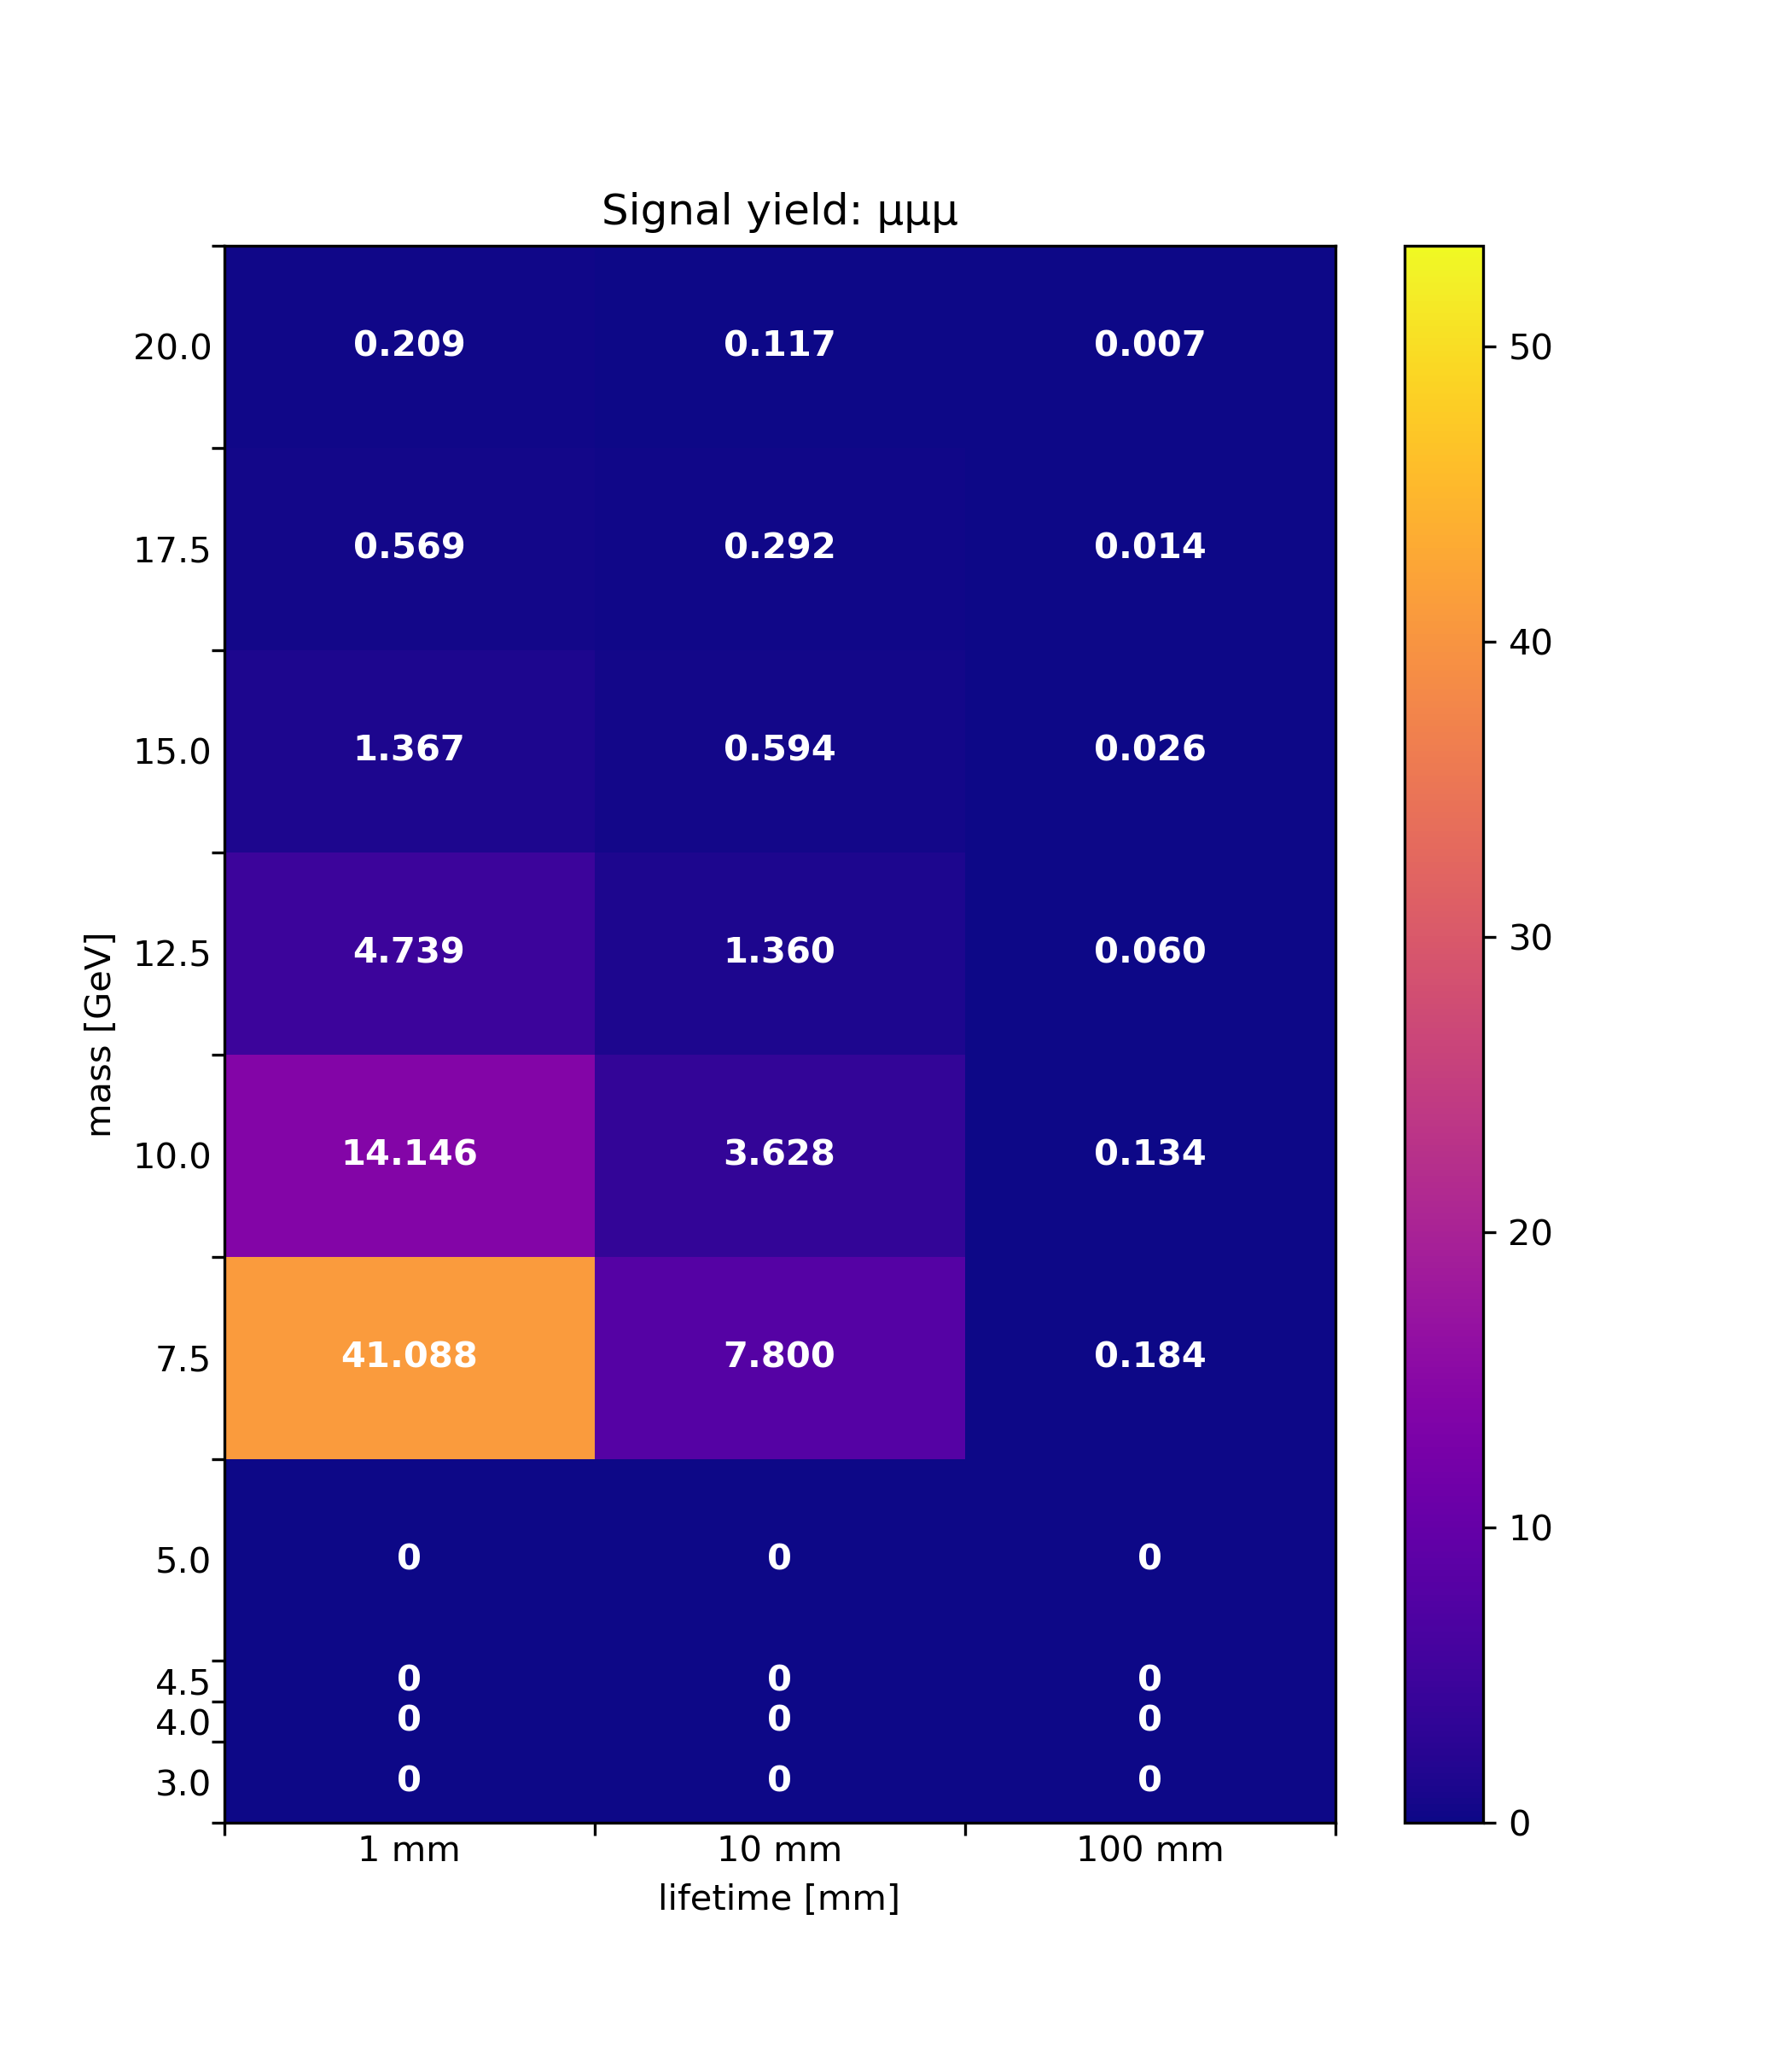

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


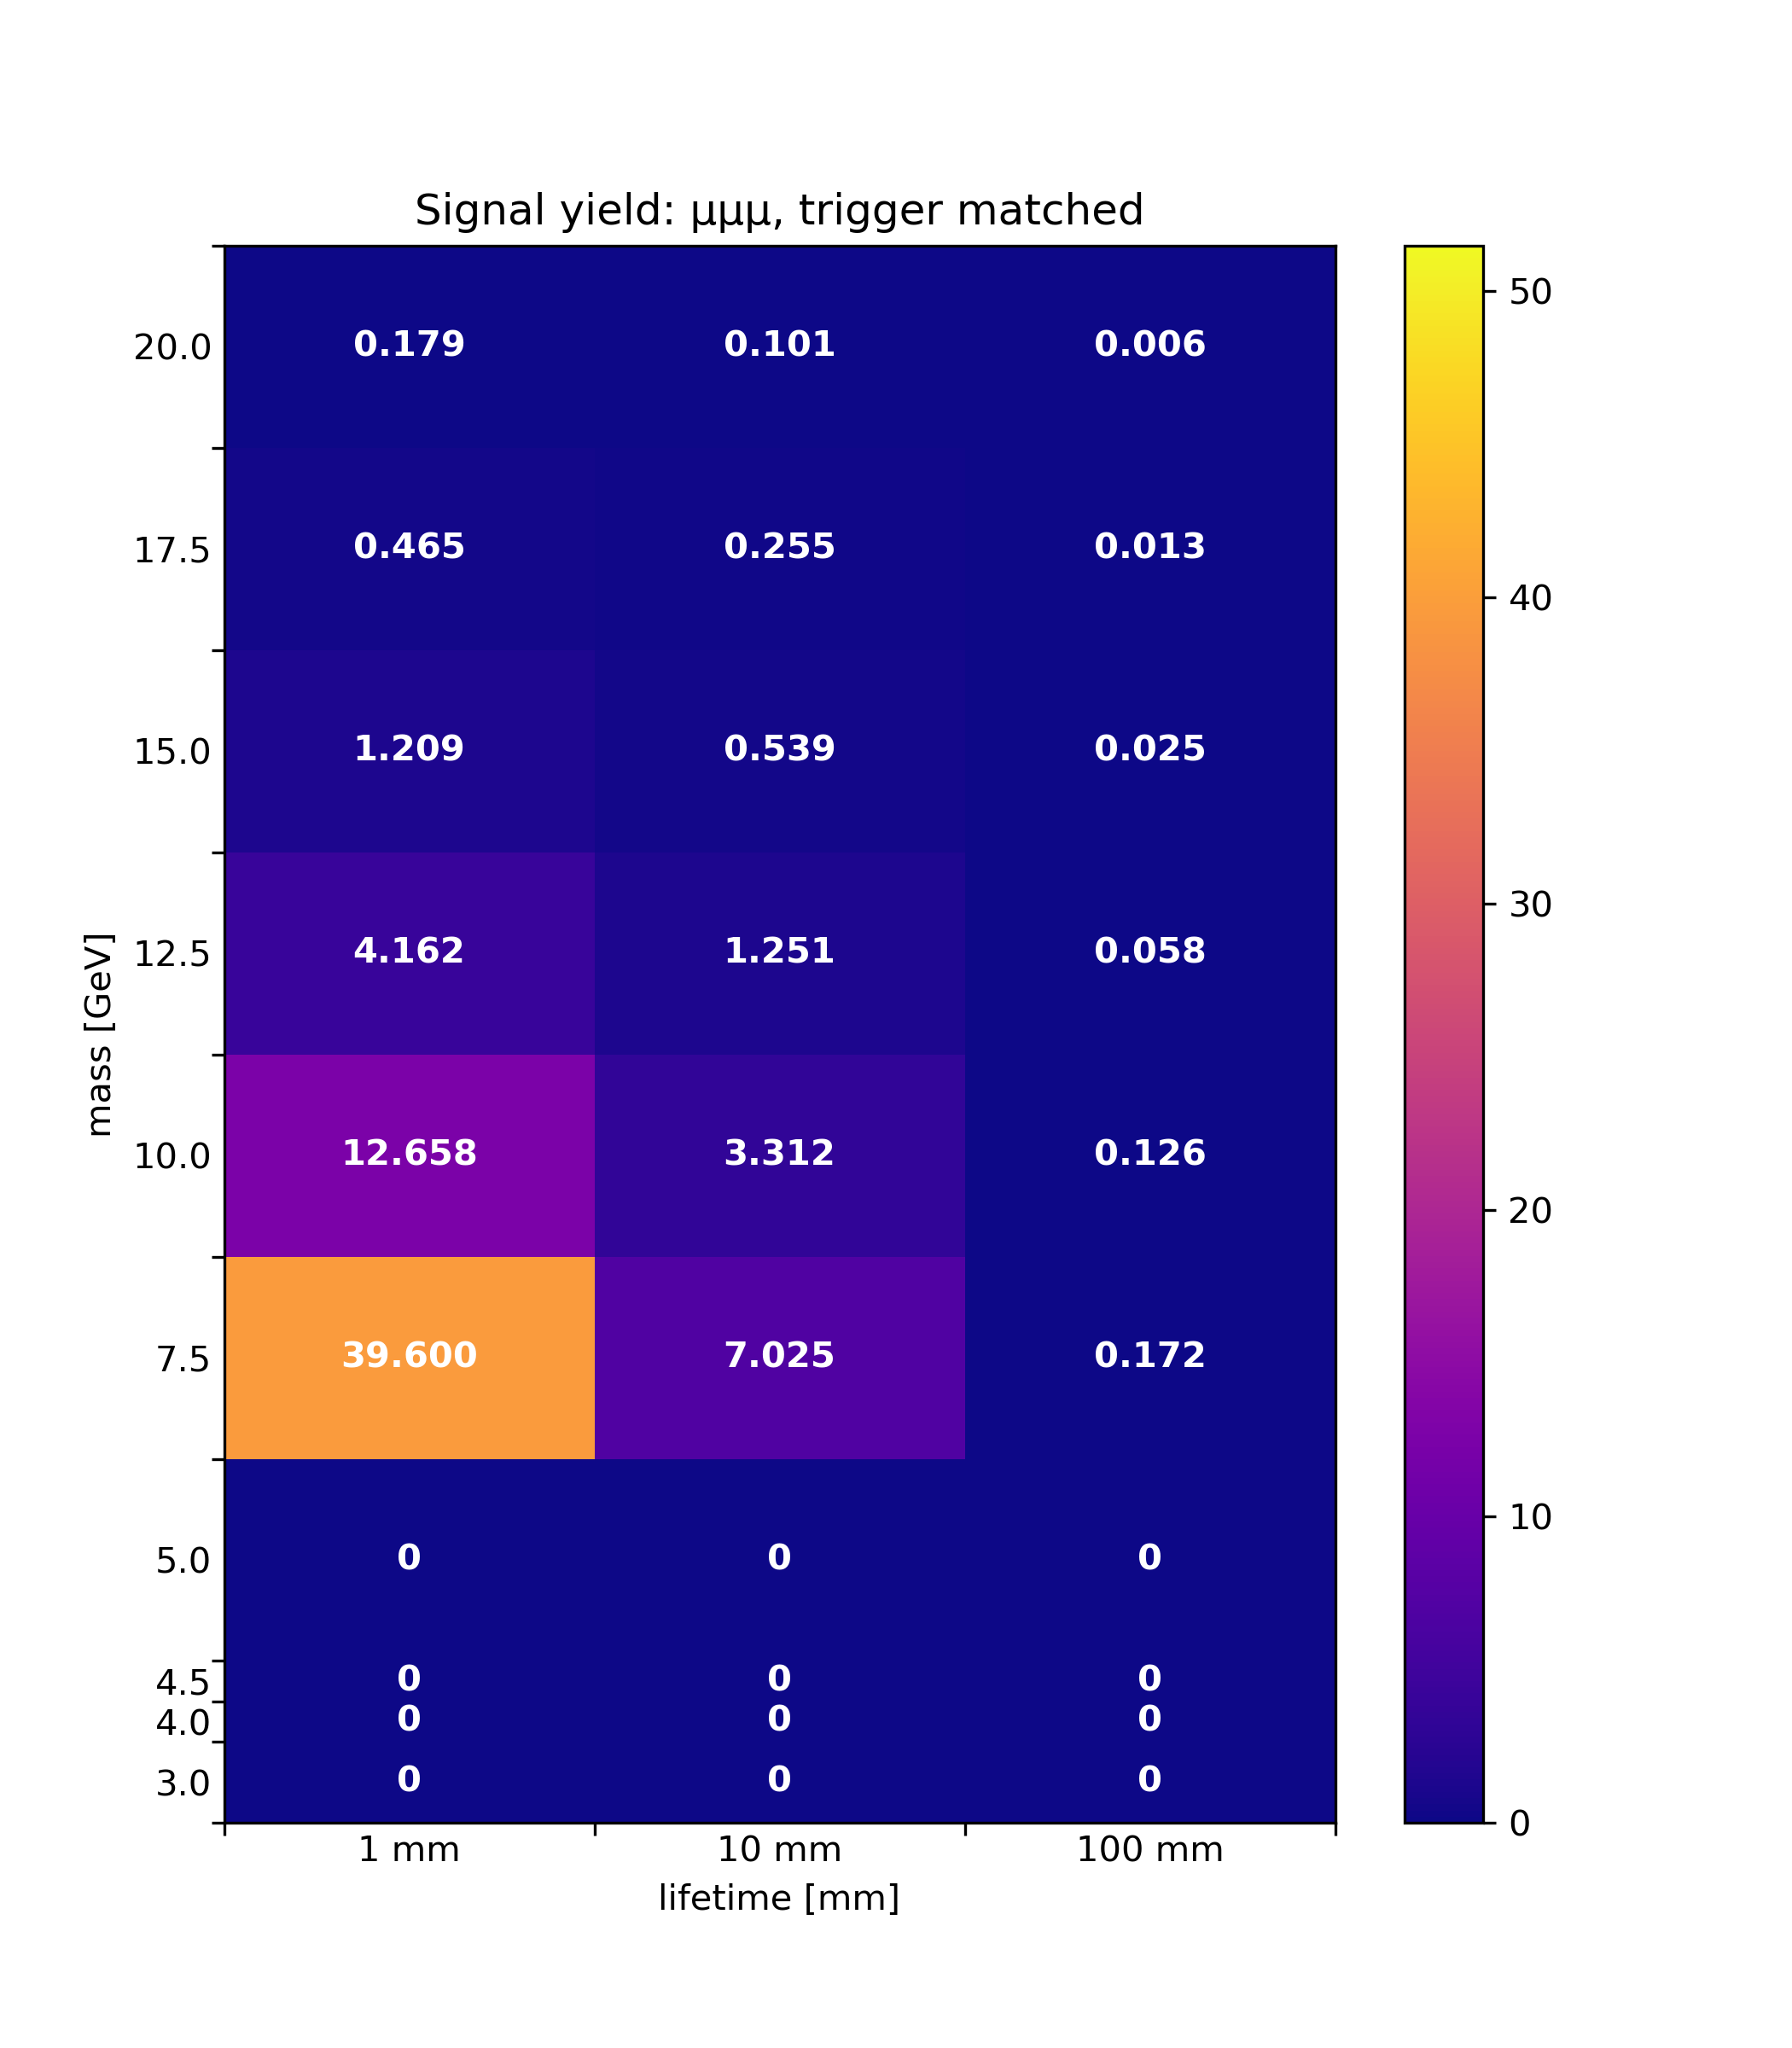

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


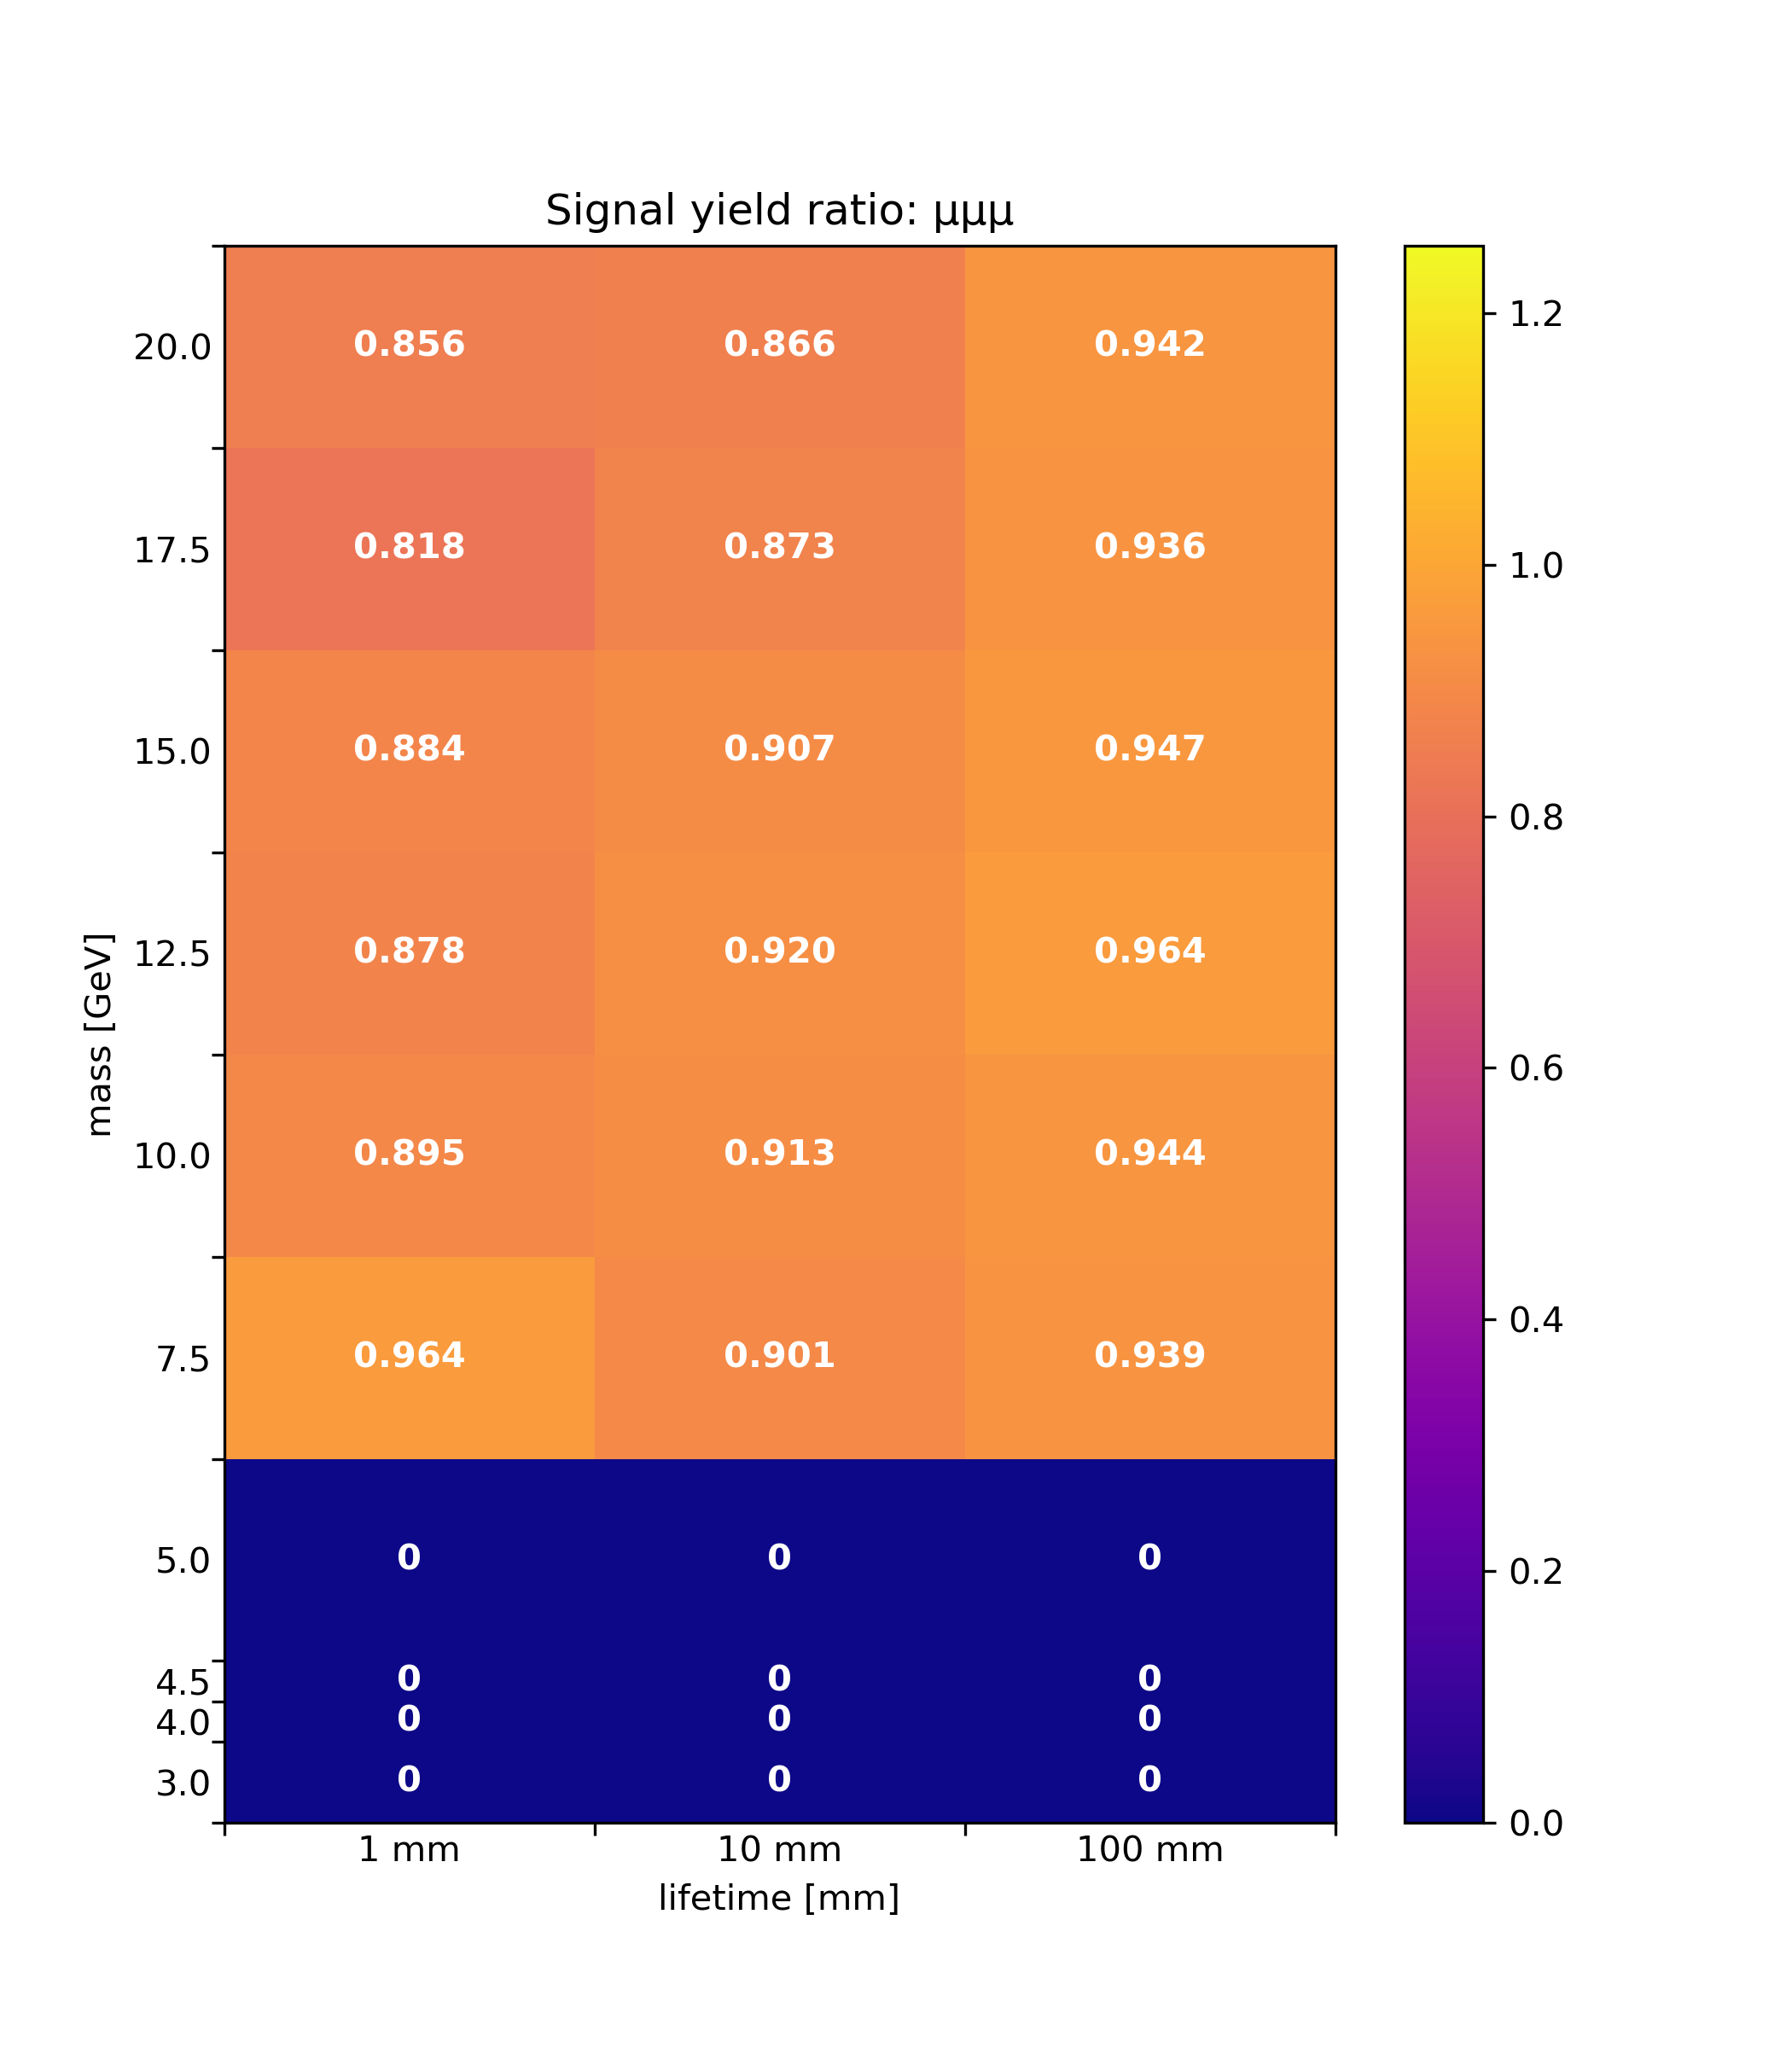

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


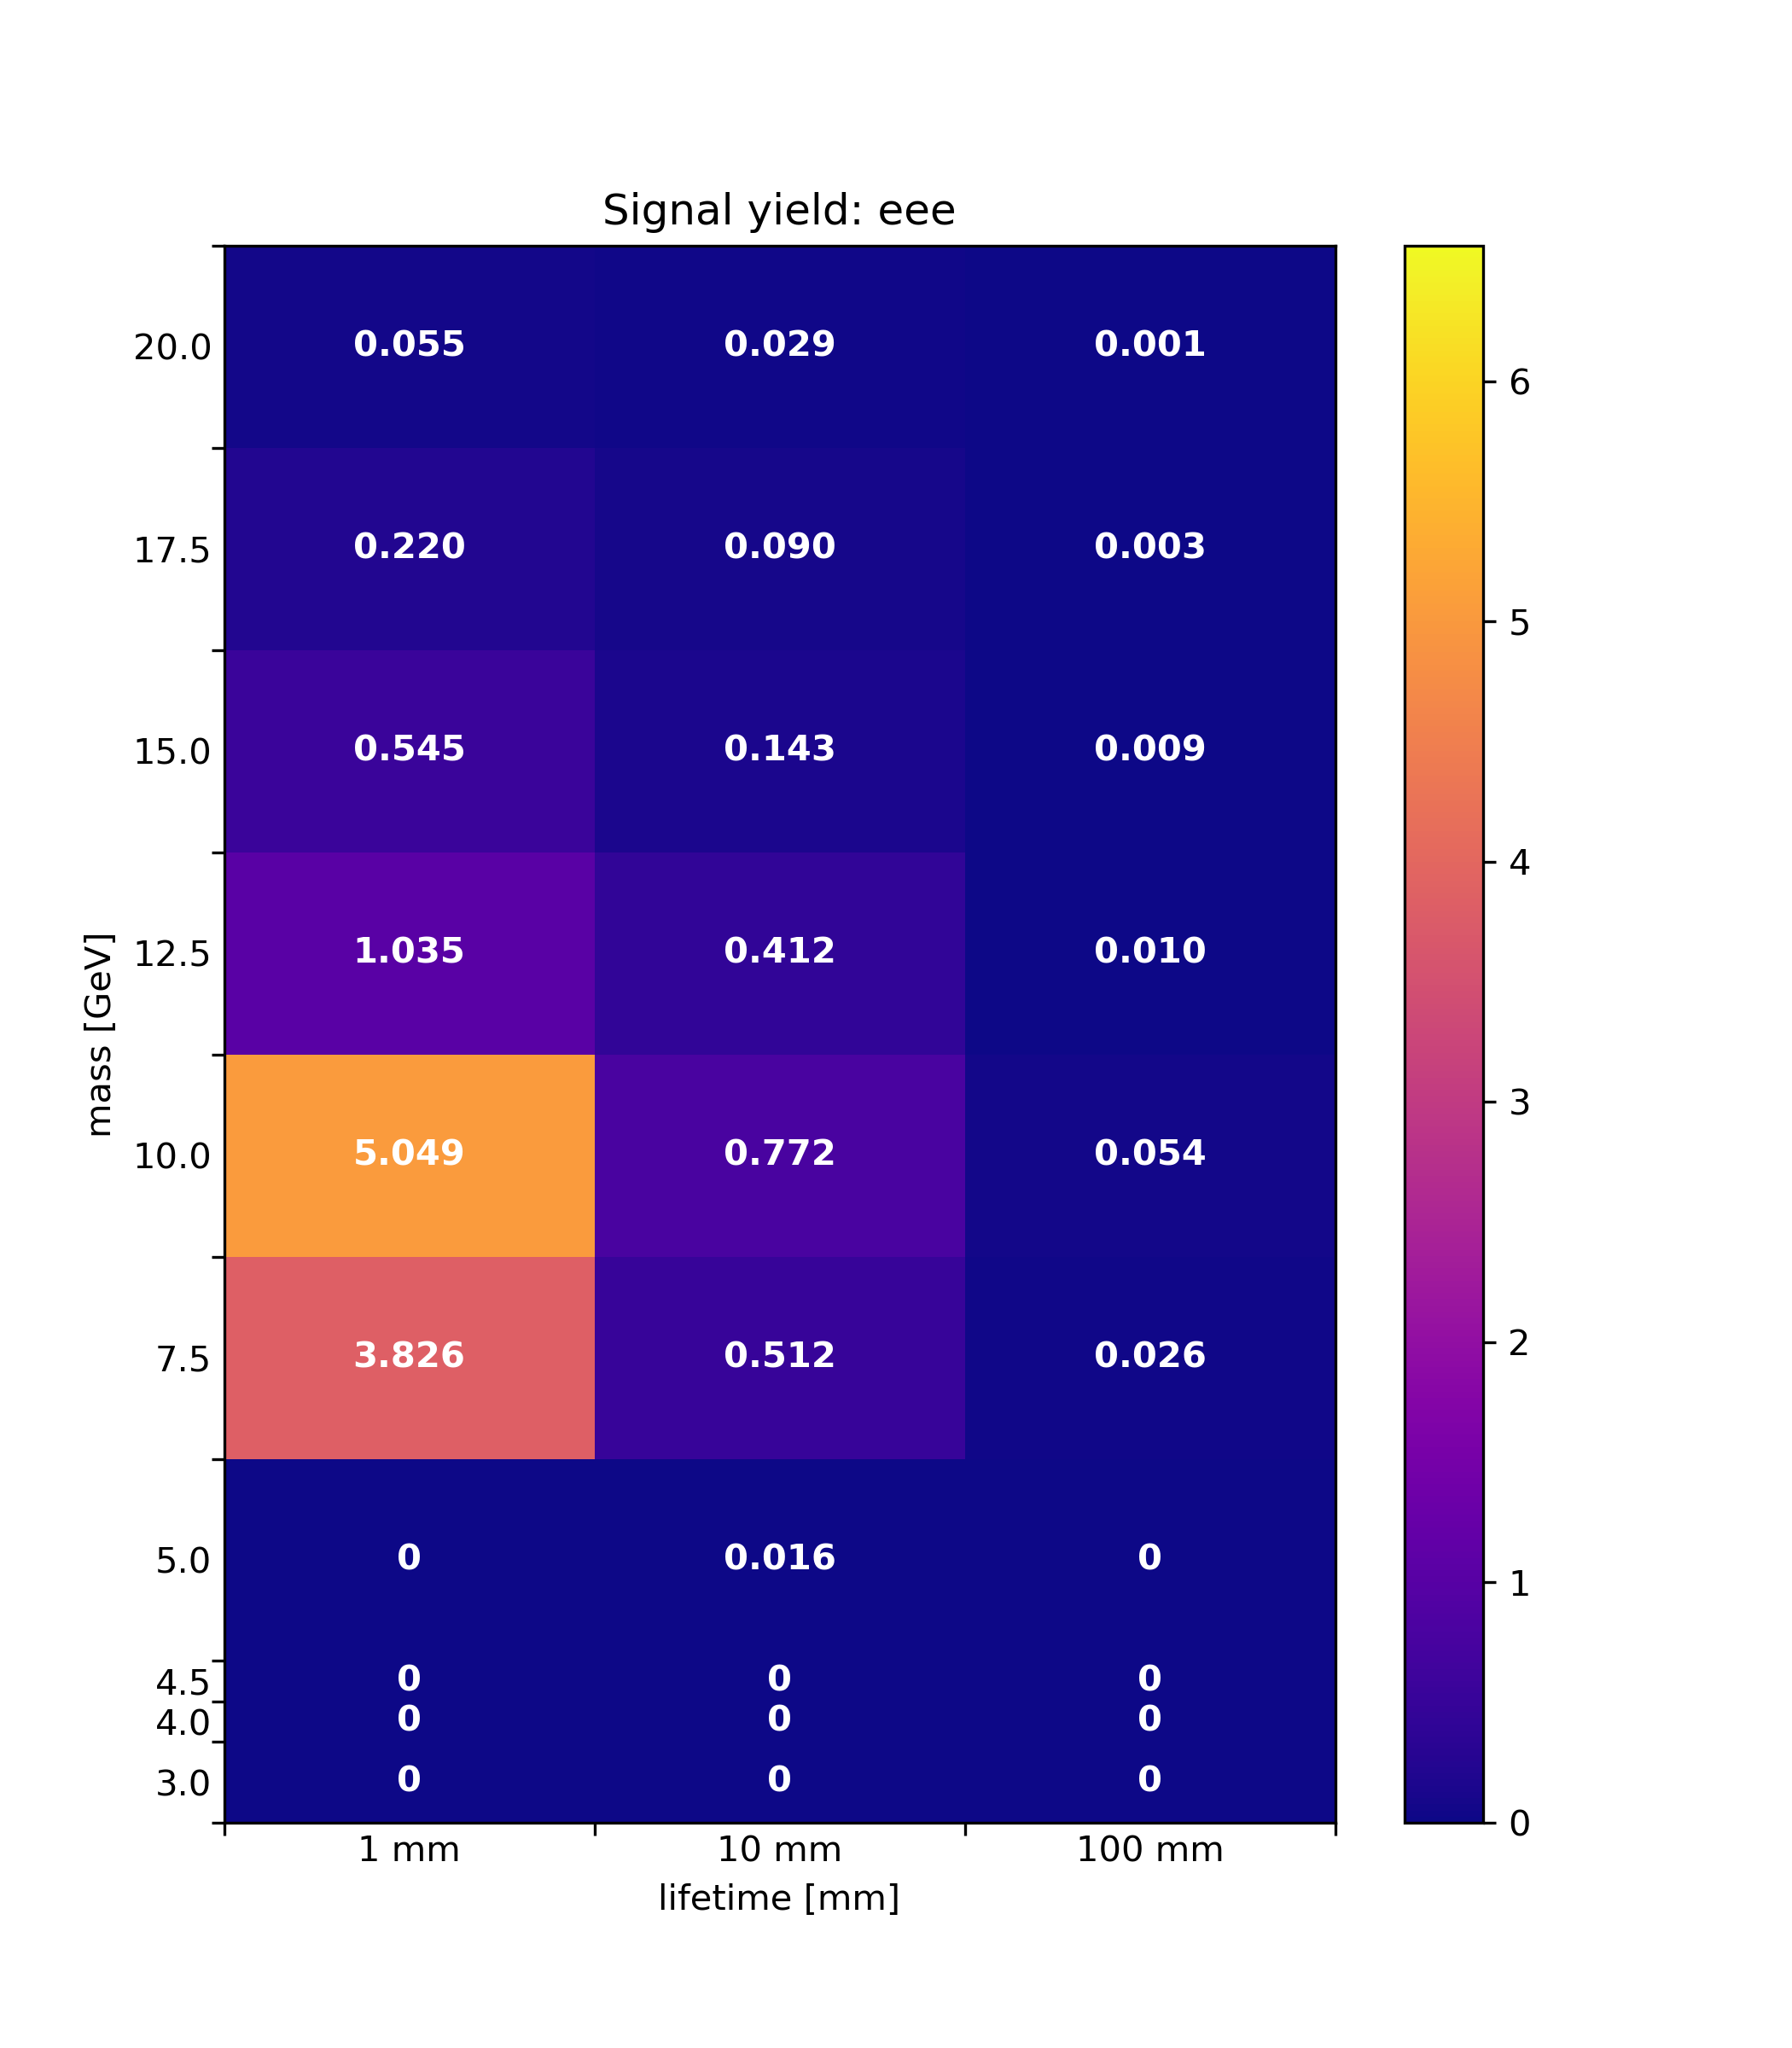

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


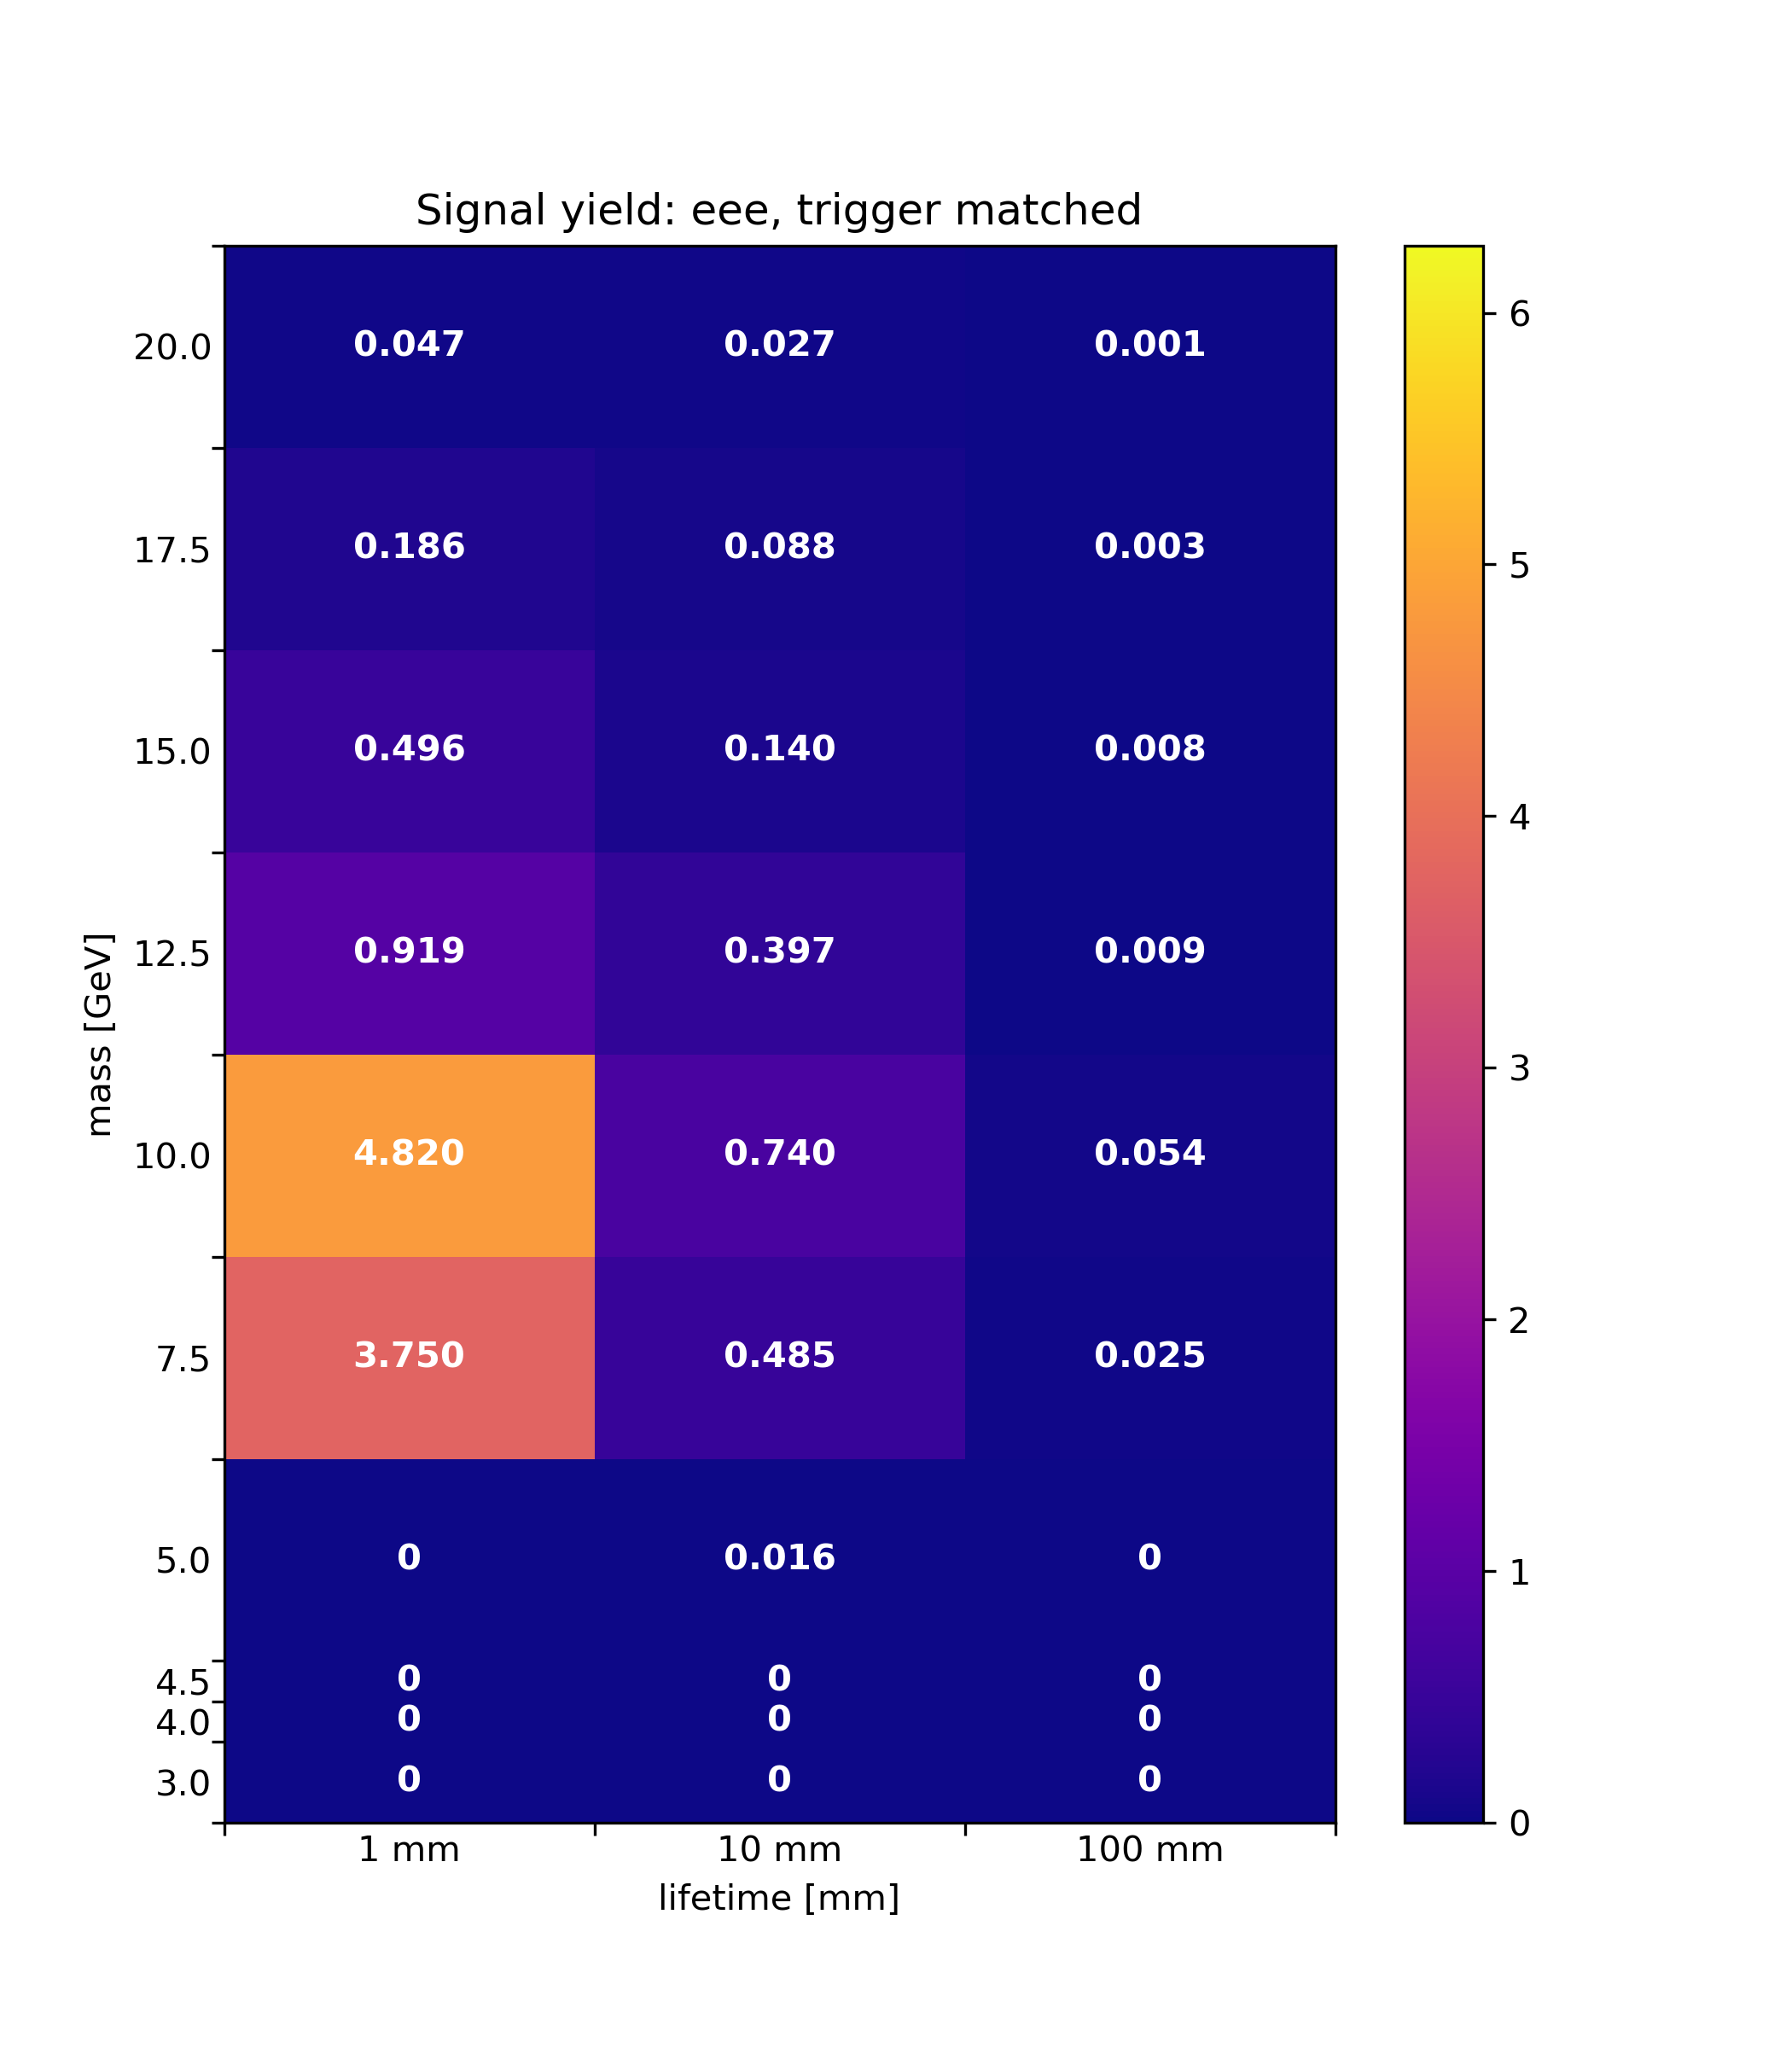

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


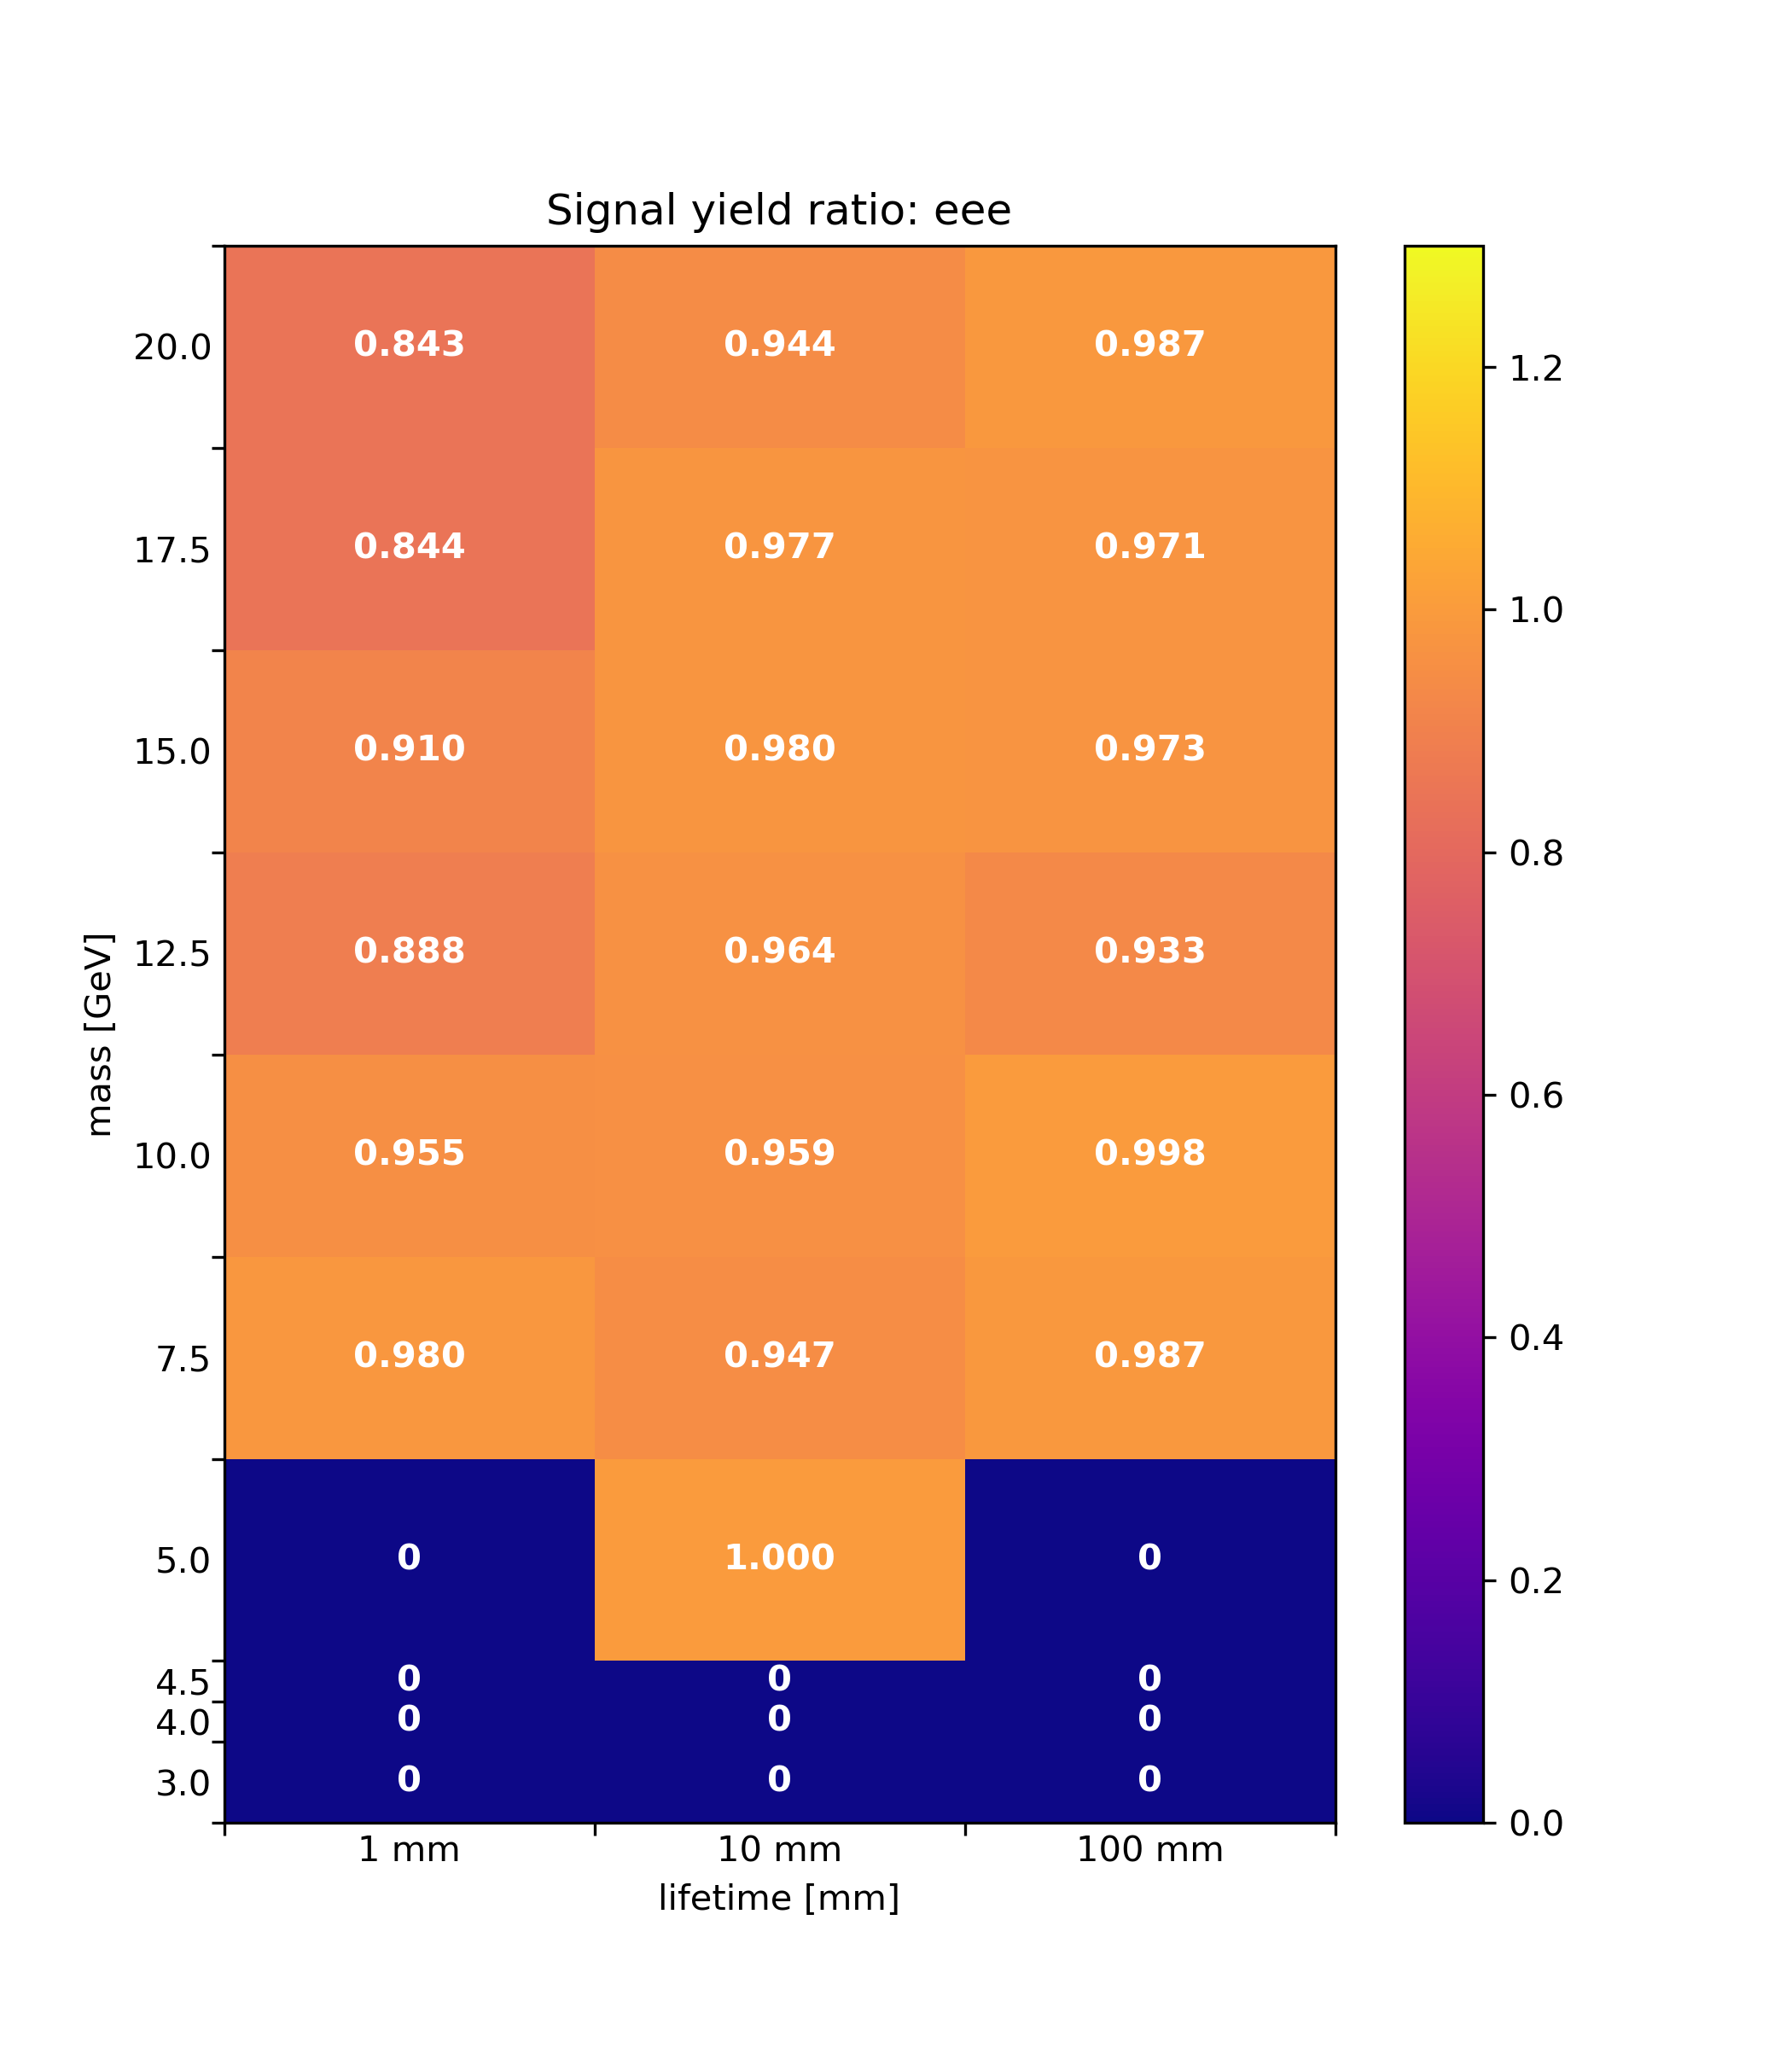

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


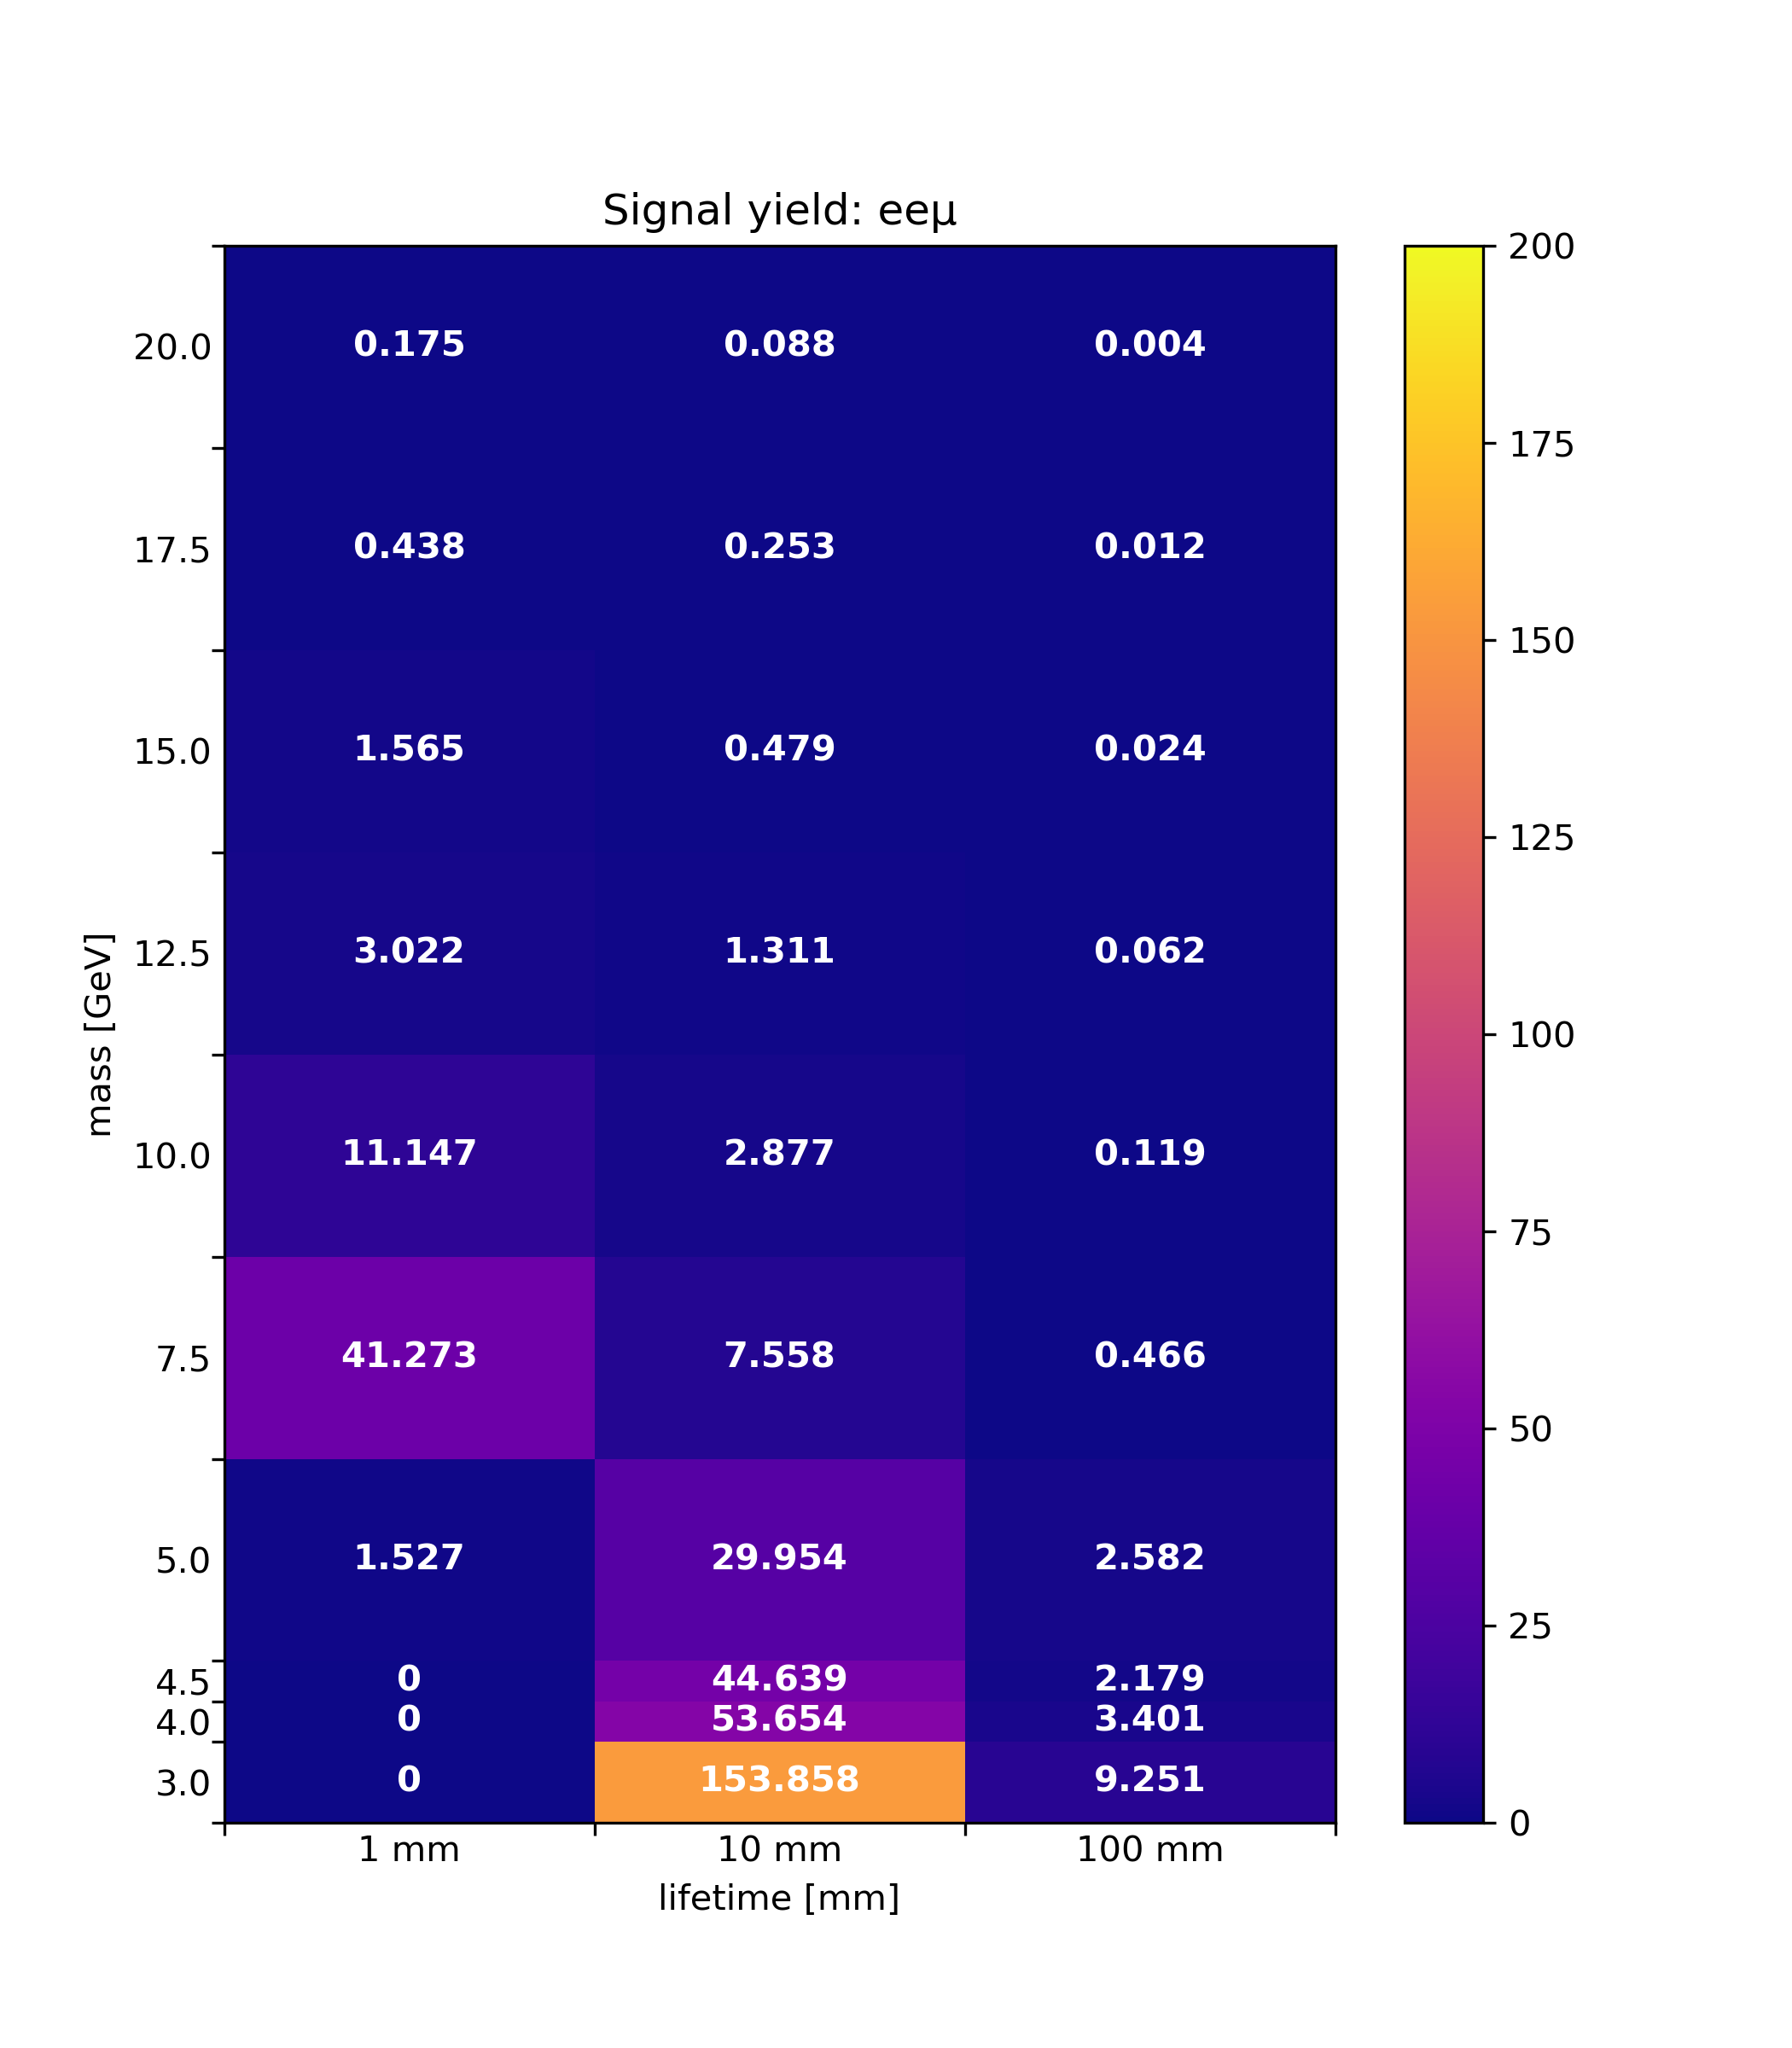

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


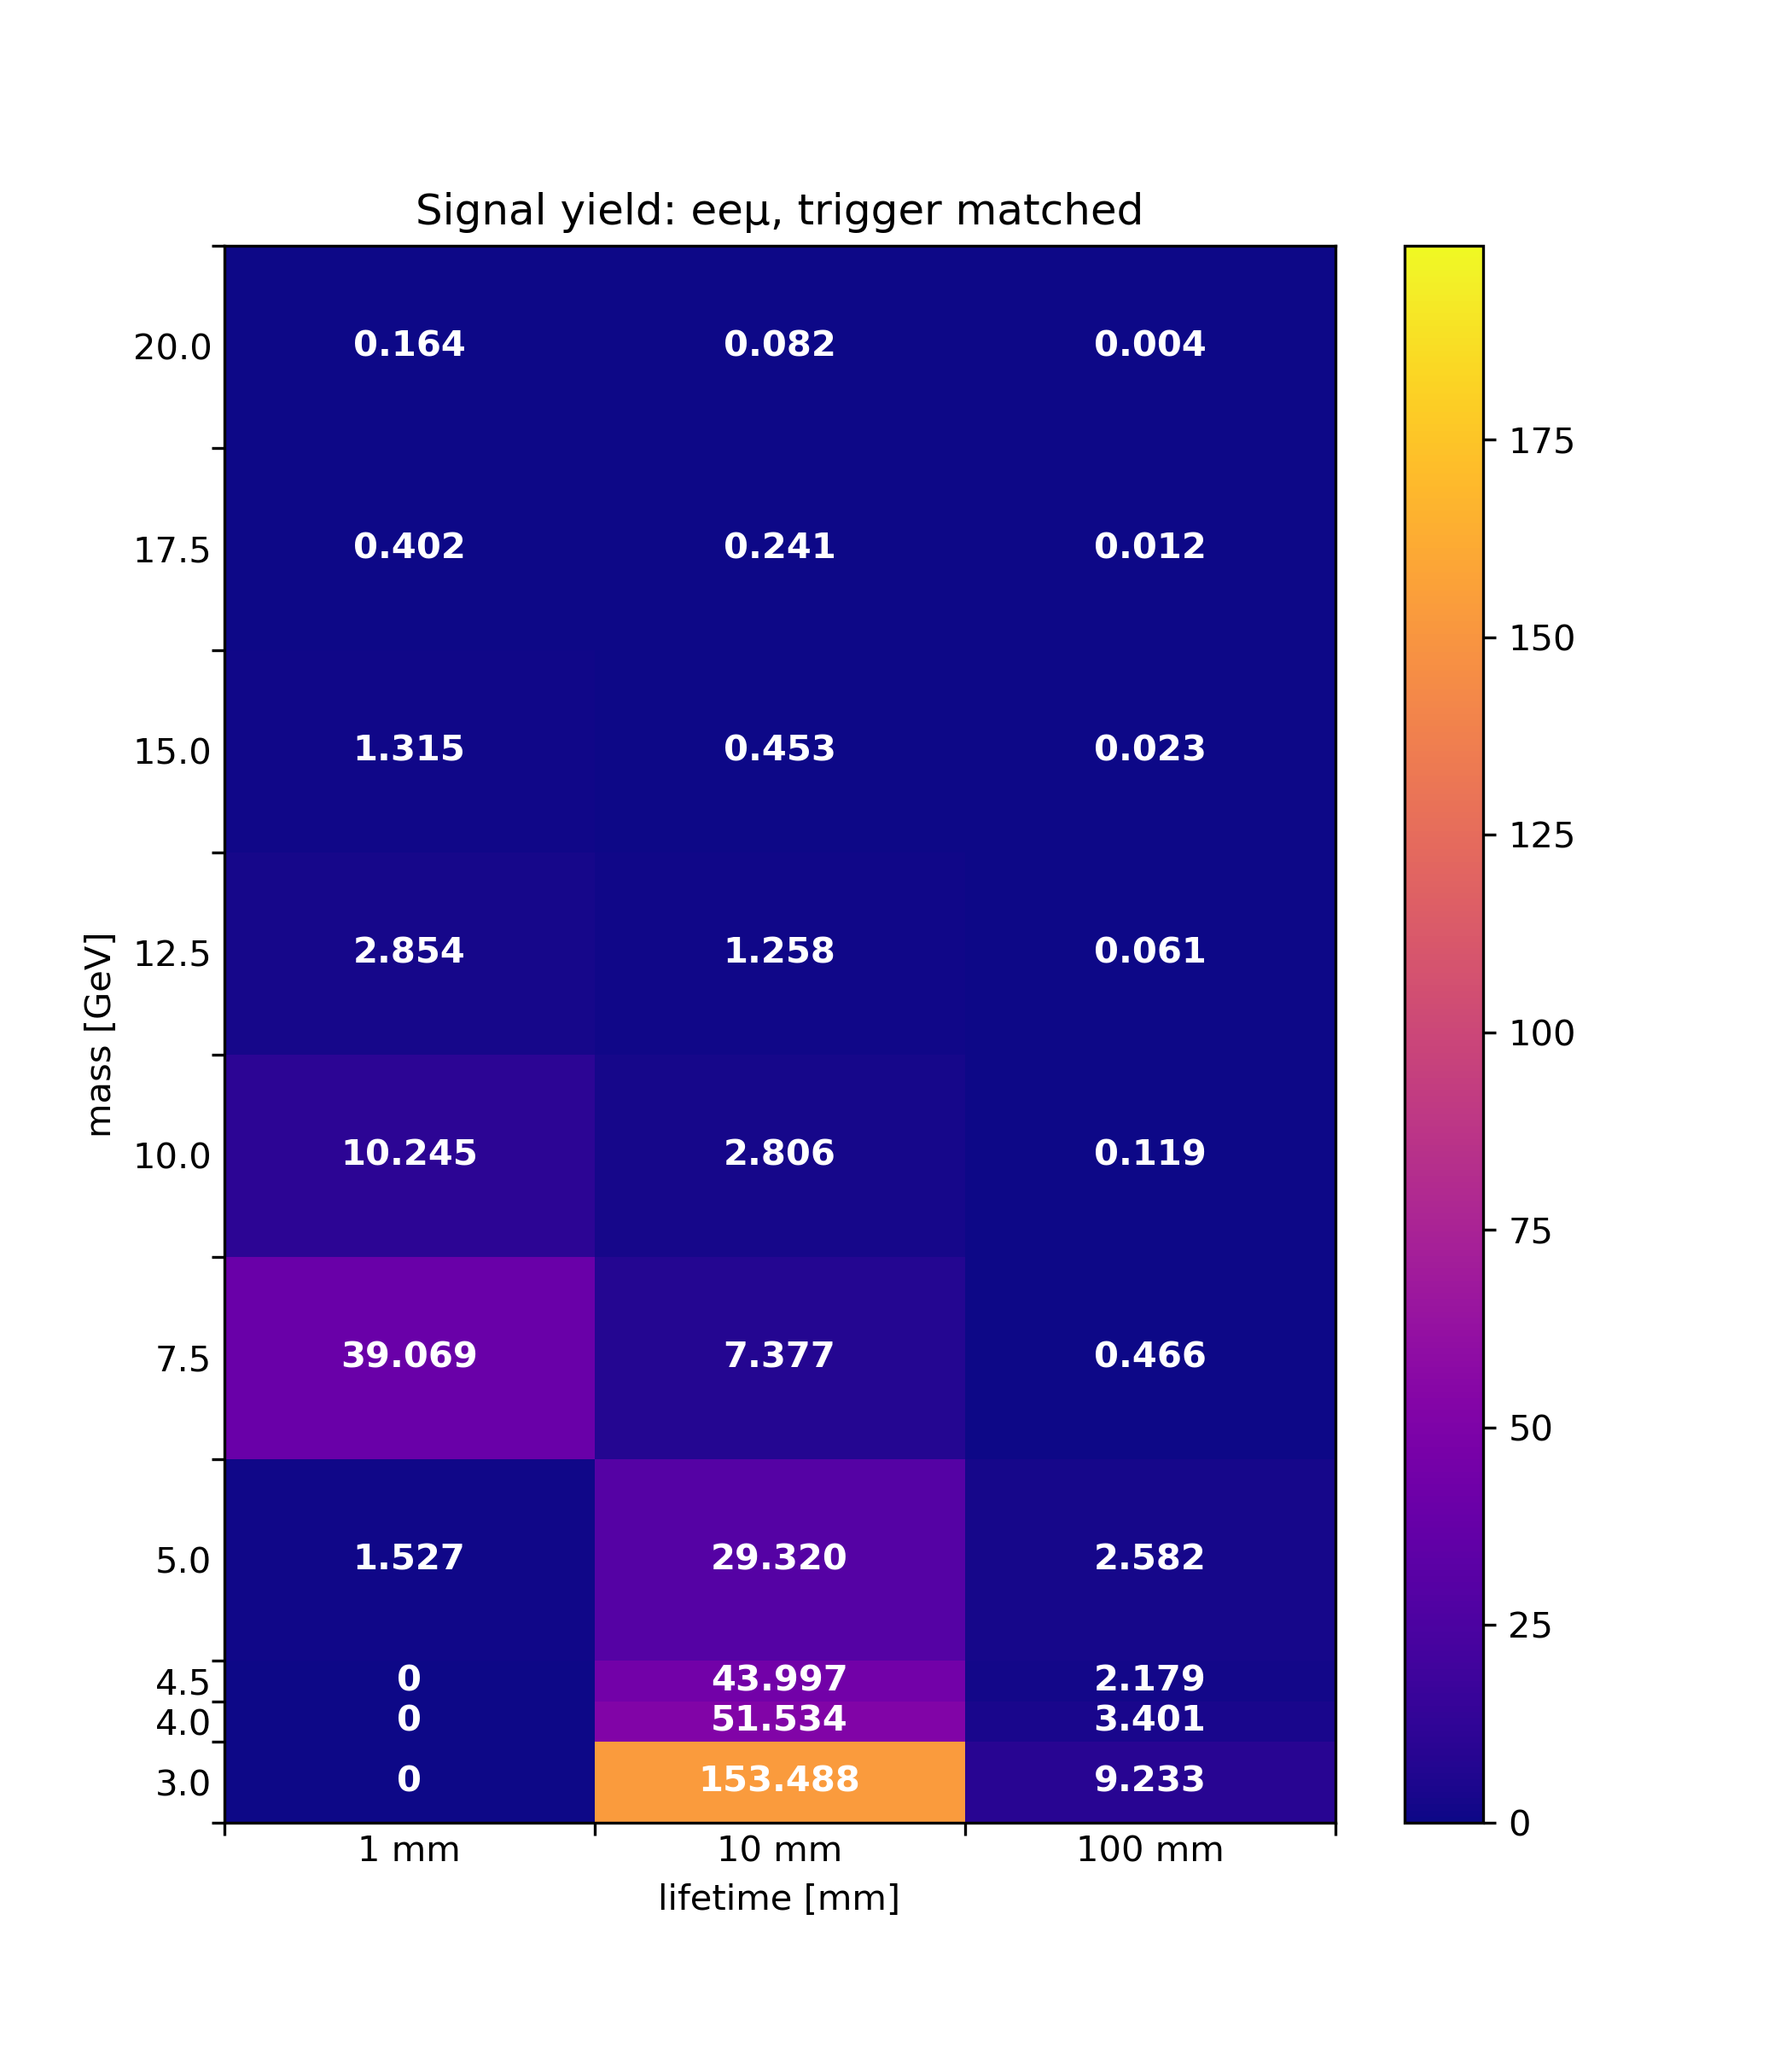

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


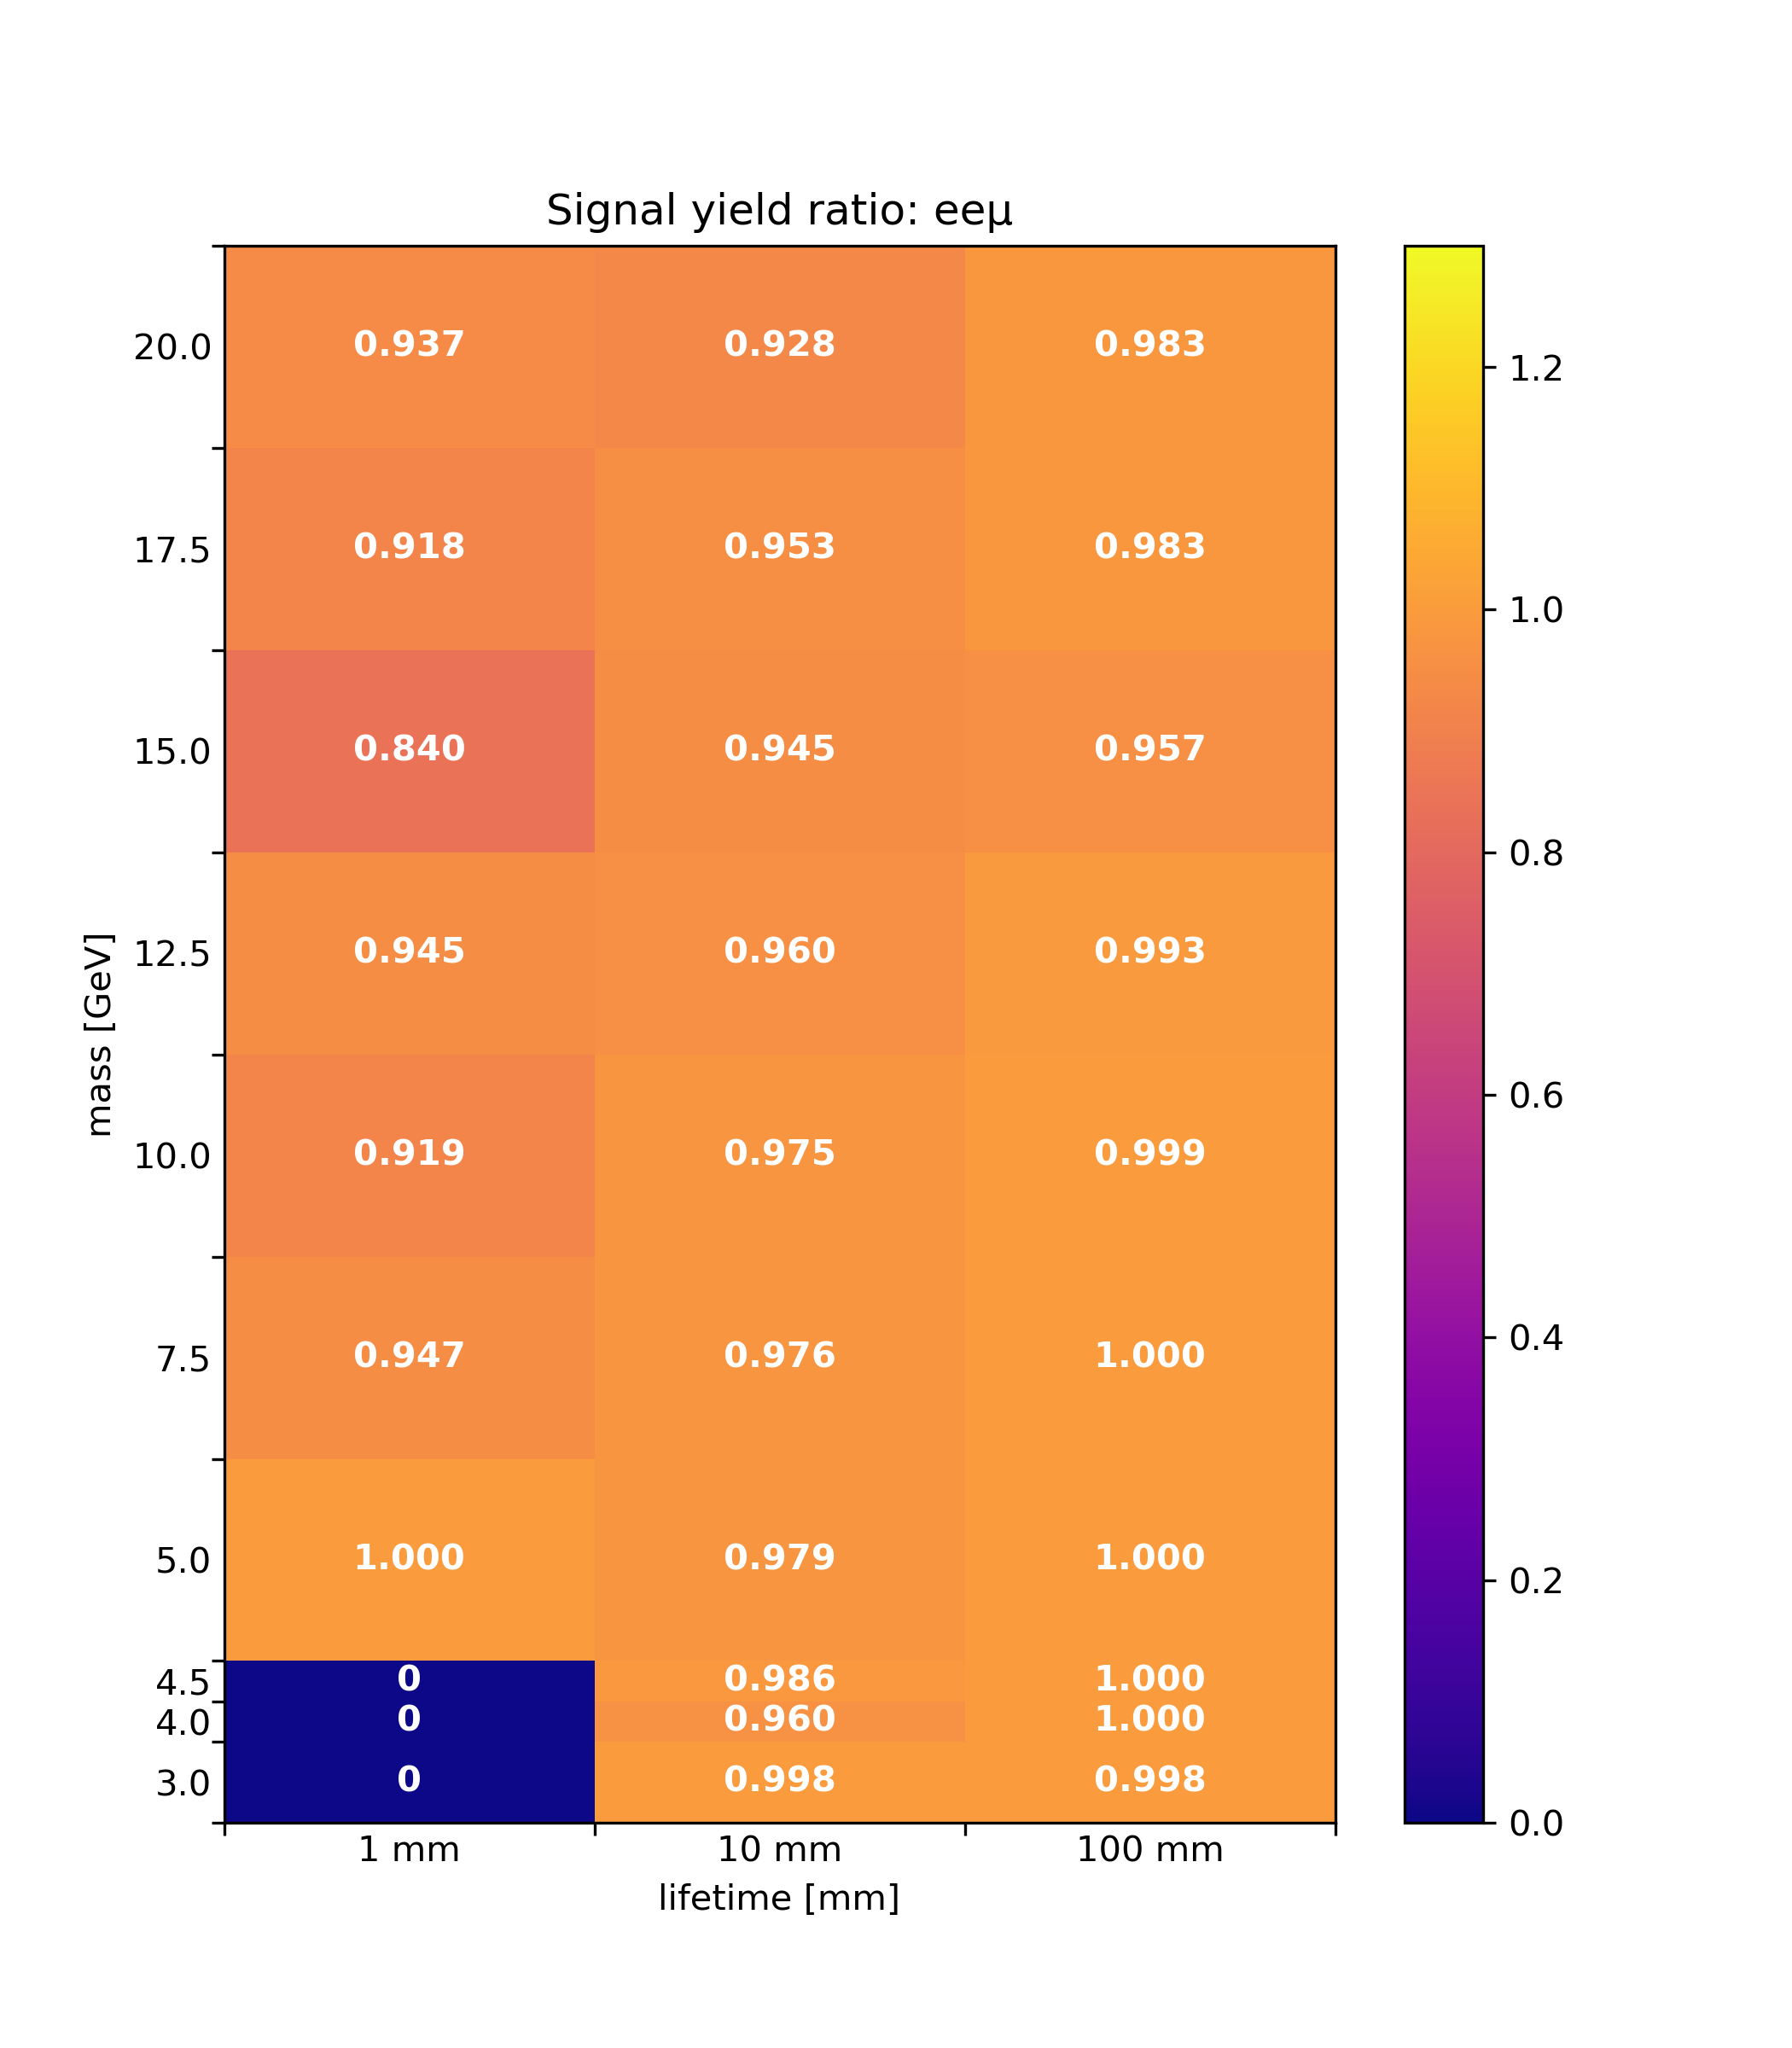

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


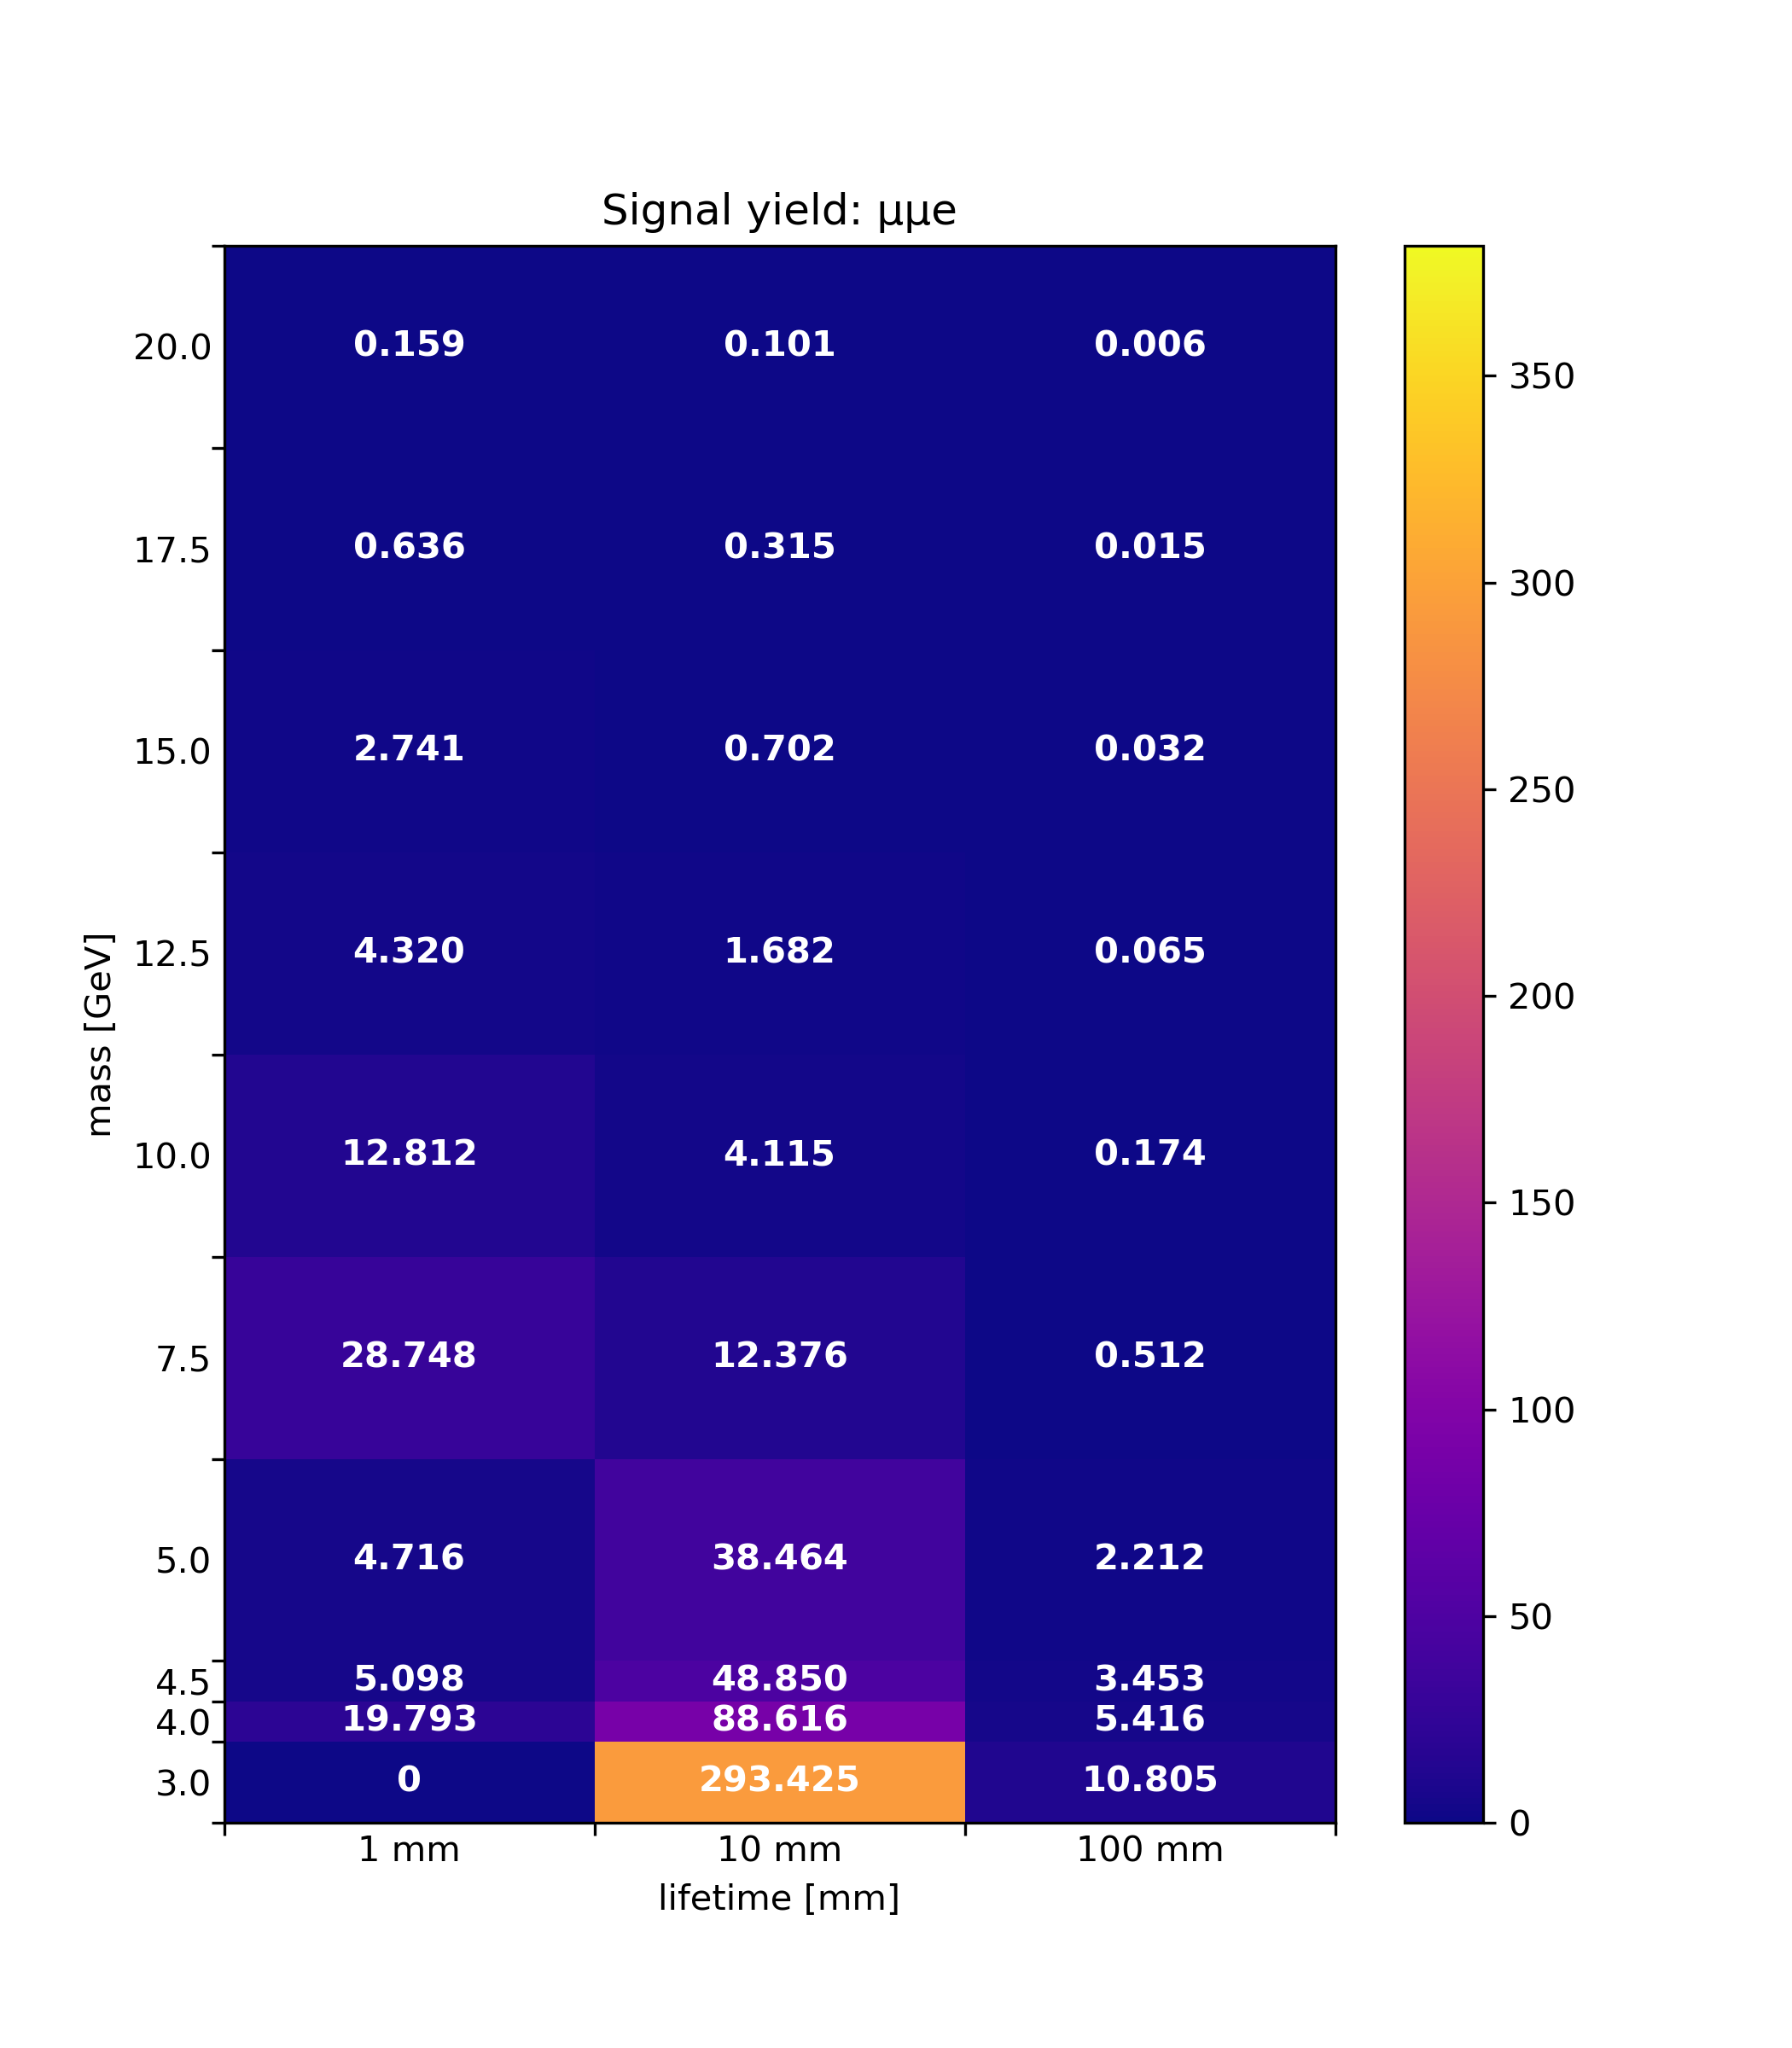

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


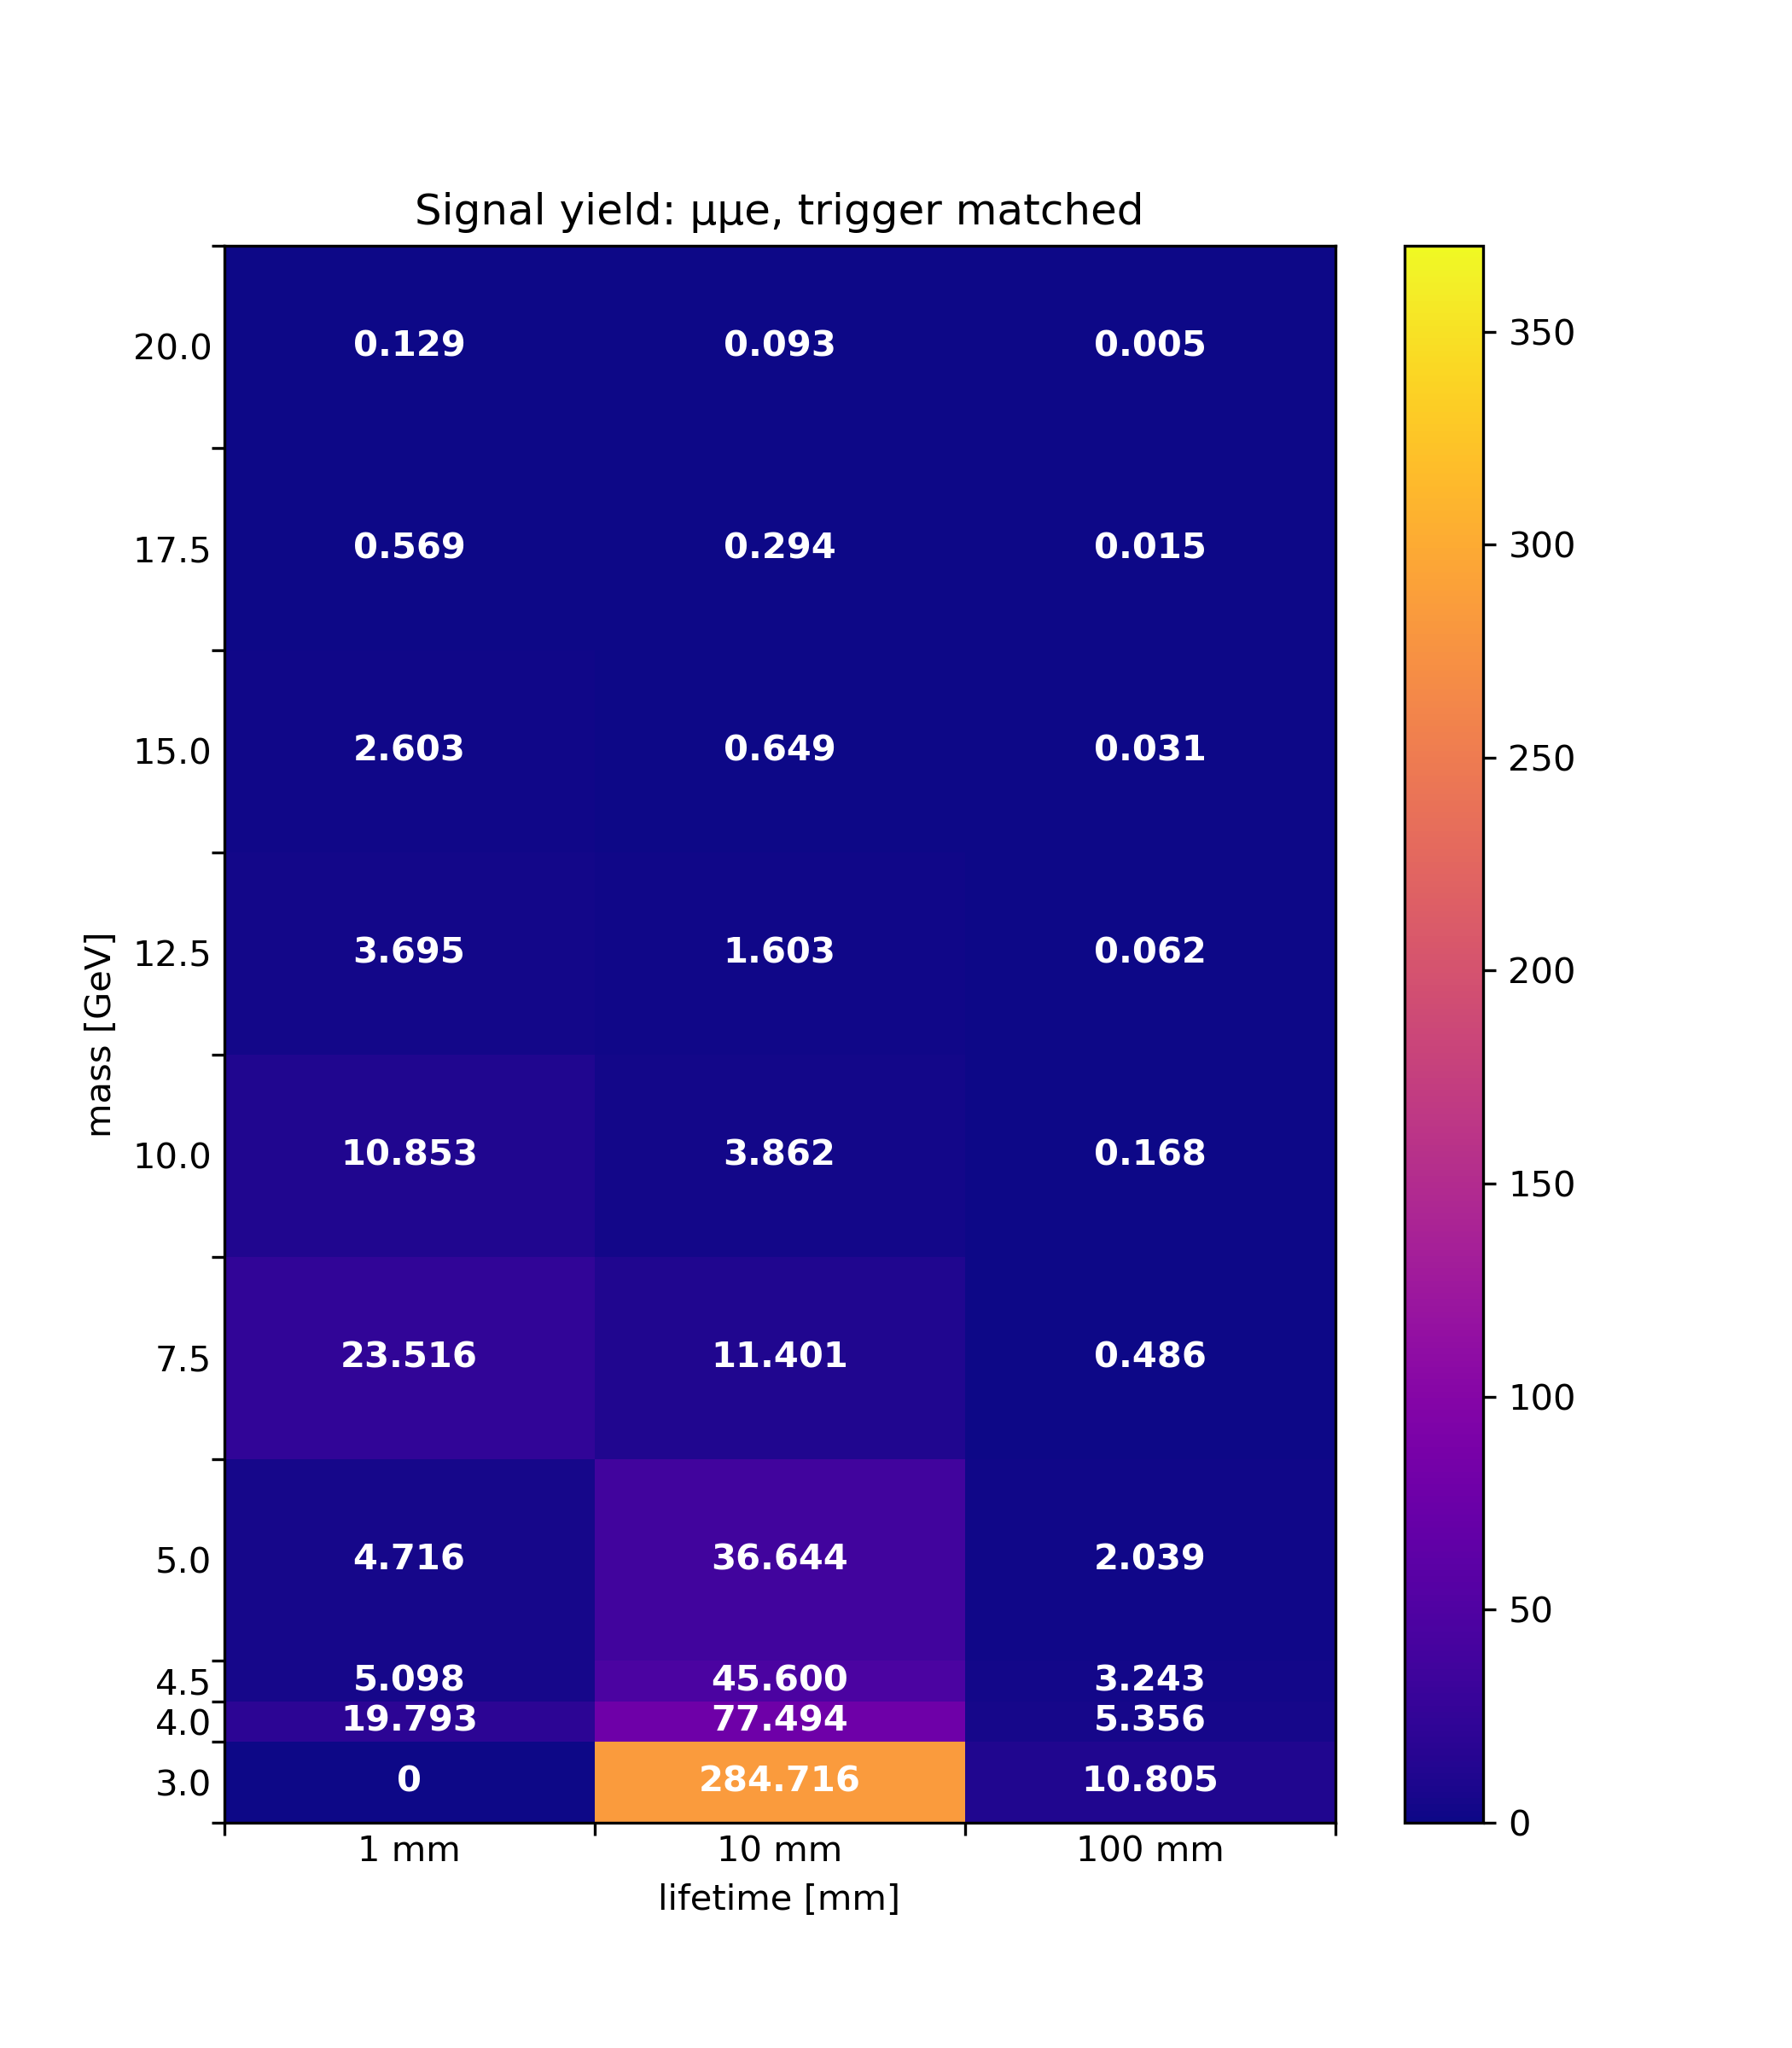

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


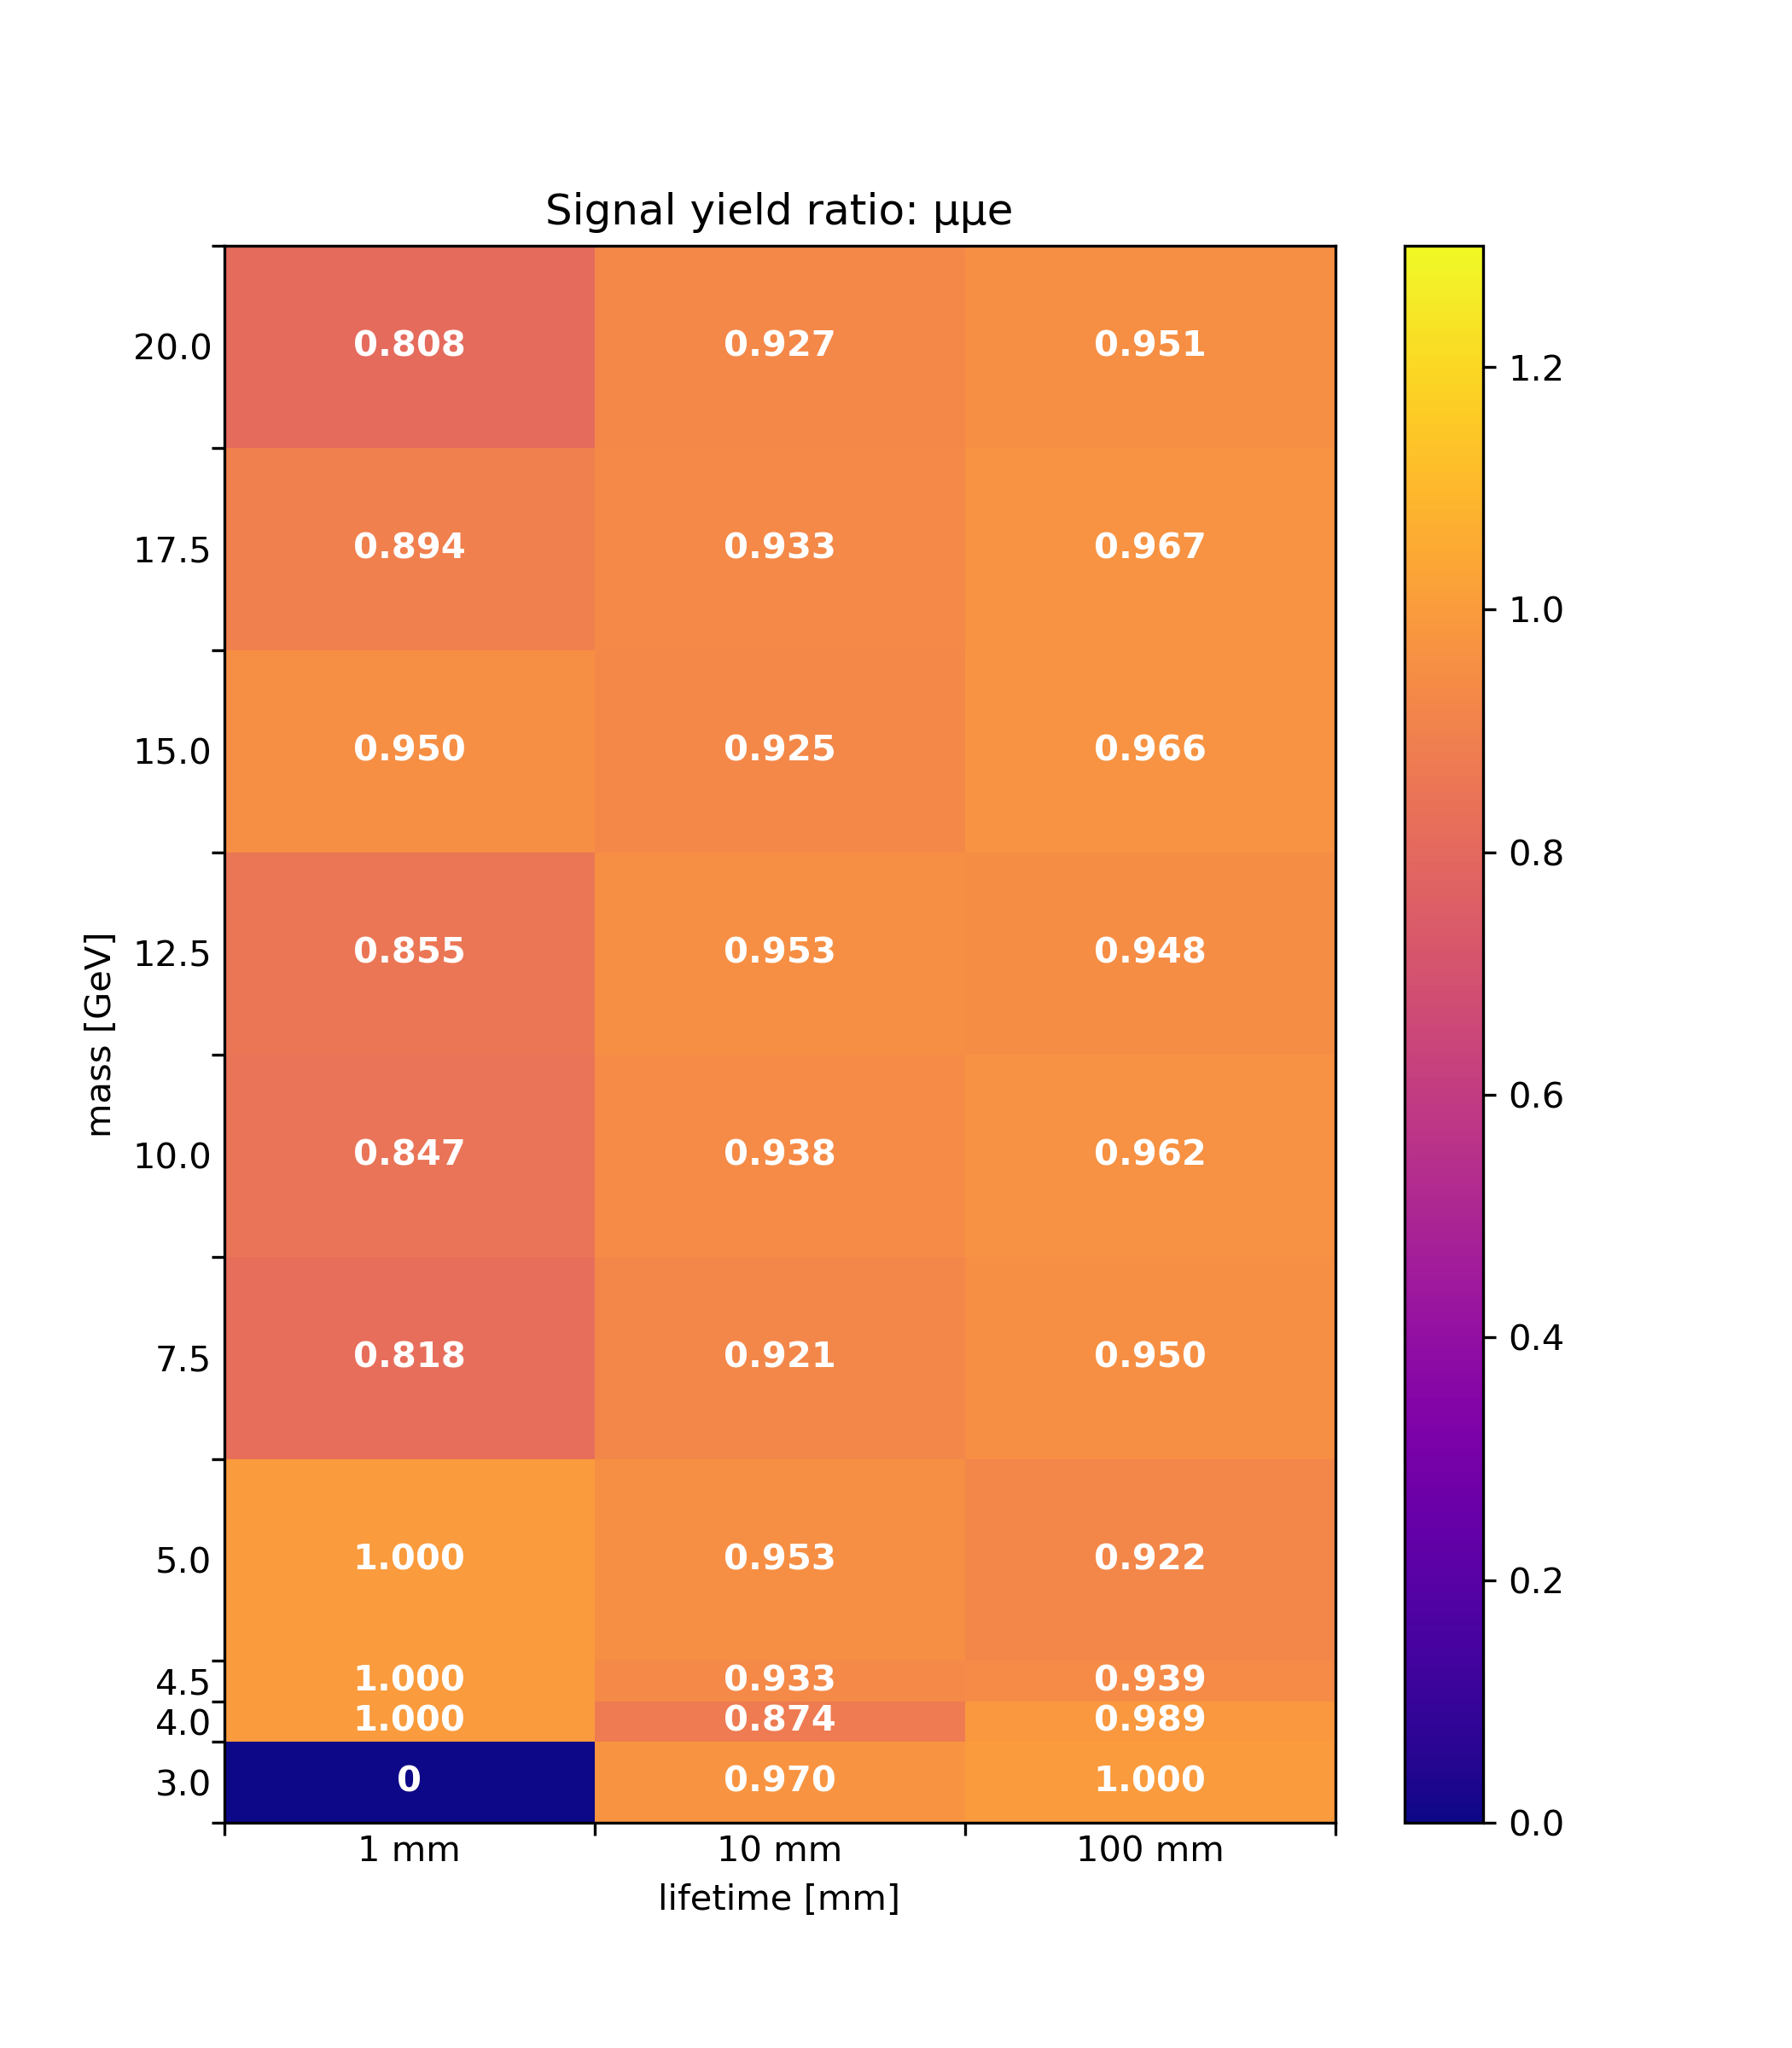

In [12]:

import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools


masses = [3.0, 4.0, 4.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0, 22.5]
lifetimes = {1:0, 10:1, 100:2}

def set_bin_content(mass, lifetime, value, arr):
    ybin = np.max(np.digitize(mass, masses)-1, 0)
    xbin = lifetimes[lifetime]
    arr[ybin,xbin] = value

def make_yield_plot(channel, title, outfile, fill_value):

    yield_arr = np.array([
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    ])

    for entry in itertools.product([channel], masses[:-1], list(lifetimes.keys()),):
        try:
            val = eval(fill_value)
        except ZeroDivisionError:
            val = 0
        file_mass = entry[1]
        file_lifetime = entry[2]
        set_bin_content(file_mass, file_lifetime, val, yield_arr)

    # do the plotting
    plot_yields(yield_arr, title, outfile)
    return yield_arr

def plot_yields(yield_arr, title, outfile):
    plt.figure(figsize=[7,8])
    plt.pcolormesh([0,1,2,3], masses, yield_arr, cmap='plasma', vmax=max(yield_arr.ravel())*1.3)

    plt.colorbar()
    ax = plt.gca()

    # mess with x ticks
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels('')
    ax.set_xticklabels(['1 mm', '10 mm', '100 mm',], minor=True)
    ax.set_xticks([0.5,1.5,2.5,], minor=True)
    ax.tick_params(axis='both', which='minor', length=0)

    # mess with y ticks
    ax.set_yticks(masses)
    ax.set_yticklabels('')
    ax.tick_params(which='minor', length=0)
    ax.set_yticks(masses[:-1] + np.diff(masses)/2, minor=True)
    ax.set_yticklabels(masses[:-1], minor=True)

    # print(ax.yaxis.get_major_ticks())
    ax.set_title(title)
    ax.set_xlabel('lifetime [mm]')
    ax.set_ylabel('mass [GeV]')

    # set text
    for i in range(len(masses)-1):
        for j in range(len(lifetimes)):
            yloc = j+.5
            xloc = masses[i] + (masses[i+1]-masses[i])/2 
            # text = ax.text(yloc, xloc , f'{yield_arr[i,j]*100:0.2f}%', ha="center", va="center", color="w", transform=ax.transData)
            text_string = f'{yield_arr[i,j]:0.3f}' if yield_arr[i,j] > 0 else '0'
            text = ax.text(yloc, xloc , text_string, ha="center", va="center", color="w", fontweight='bold', transform=ax.transData)

    plt.savefig('/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/'+outfile+'.png', dpi=300)
    plt.savefig('/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/'+outfile+'.pdf', dpi=300)

yield_arr = make_yield_plot(channel='uuu', title='Signal yield: μμμ', outfile='uuu_yield', fill_value='yields[entry][0]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/uuu_yield.png'));

yield_arr = make_yield_plot(channel='uuu', title='Signal yield: μμμ, trigger matched', outfile='uuu_yield_trigger', fill_value='yields[entry][1]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/uuu_yield_trigger.png'));

yield_arr = make_yield_plot(channel='uuu', title='Signal yield ratio: μμμ', outfile='uuu_yield_ratio', fill_value='yields[entry][1]/yields[entry][0]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/uuu_yield_ratio.png'));

yield_arr = make_yield_plot(channel='eee', title='Signal yield: eee', outfile='eee_yield', fill_value='yields[entry][0]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/eee_yield.png'));

yield_arr = make_yield_plot(channel='eee', title='Signal yield: eee, trigger matched', outfile='eee_yield_trigger', fill_value='yields[entry][1]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/eee_yield_trigger.png'));

yield_arr = make_yield_plot(channel='eee', title='Signal yield ratio: eee', outfile='eee_yield_ratio', fill_value='yields[entry][1]/yields[entry][0]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/eee_yield_ratio.png'));

yield_arr = make_yield_plot(channel='eeu', title='Signal yield: eeμ', outfile='eeu_yield', fill_value='yields[entry][0]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/eeu_yield.png'));

yield_arr = make_yield_plot(channel='eeu', title='Signal yield: eeμ, trigger matched', outfile='eeu_yield_trigger', fill_value='yields[entry][1]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/eeu_yield_trigger.png'));

yield_arr = make_yield_plot(channel='eeu', title='Signal yield ratio: eeμ', outfile='eeu_yield_ratio', fill_value='yields[entry][1]/yields[entry][0]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/eeu_yield_ratio.png'));

yield_arr = make_yield_plot(channel='uue', title='Signal yield: μμe', outfile='uue_yield', fill_value='yields[entry][0]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/uue_yield.png'));

yield_arr = make_yield_plot(channel='uue', title='Signal yield: μμe, trigger matched', outfile='uue_yield_trigger', fill_value='yields[entry][1]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/uue_yield_trigger.png'));

yield_arr = make_yield_plot(channel='uue', title='Signal yield ratio: μμe', outfile='uue_yield_ratio', fill_value='yields[entry][1]/yields[entry][0]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/uue_yield_ratio.png'));

